In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import rc_context
import matplotlib.pyplot as plt
import util
import neighborhoodAnalysis as nha
import numpy as np
import os
from tqdm import tqdm

# single-cell count clustering

In [73]:
cell_df_dir = r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_analysis\spagnn\cell_df'
cell_l = os.listdir(cell_df_dir)
cell_l.sort()
counts = []
cell_types = []
for cell in tqdm(cell_l):
    if cell.endswith('.csv'):
        cell_df = pd.read_csv(os.path.join(cell_df_dir,cell))
        counts.append(util.counting(cell_df,'cellID','gene'))
        cell_types.append(cell_df['cellID'].tolist()[0].split('_')[0].upper()+'-MSC')
single_cell_count = pd.concat(counts)

100%|██████████| 554/554 [00:22<00:00, 24.25it/s]


In [74]:
single_cell_count = single_cell_count.fillna(0)

In [75]:
count_adata = sc.AnnData(single_cell_count.values[:,1:])
count_adata.var_names = single_cell_count.columns.tolist()[1:]
count_adata.obs['cell_id'] = single_cell_count['Count_id'].tolist()

In [76]:
sc.pp.normalize_total(count_adata)

In [77]:
sc.pp.neighbors(count_adata)

In [78]:
sc.tl.leiden(count_adata,resolution=1)

In [79]:
sc.tl.umap(count_adata)

In [80]:
sc.tl.tsne(count_adata)

c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [81]:
cell_types = pd.Categorical(cell_types,ordered=True, categories=['BM-MSC','UC-MSC'])
count_adata.obs['cell_types'] = cell_types
count_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [2]:
count_adata = sc.read_h5ad(r'.\results\count_adata.h5ad')

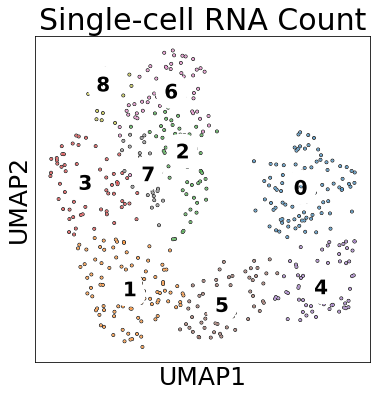

In [199]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(count_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Single-cell RNA Count',
               save=' hydrogel_single_cell_count_clustering.png')

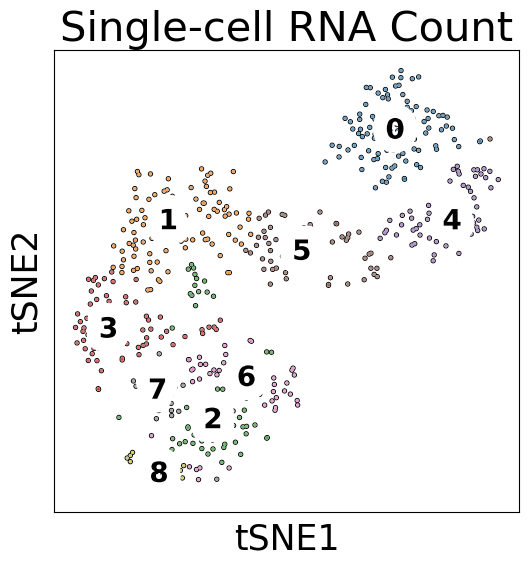

In [147]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(count_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Single-cell RNA Count',
               save=r' hydrogel_single_cell_count_clustering.png')

c:\Users\zfang38\AppData\Local\anaconda3\envs\skim\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


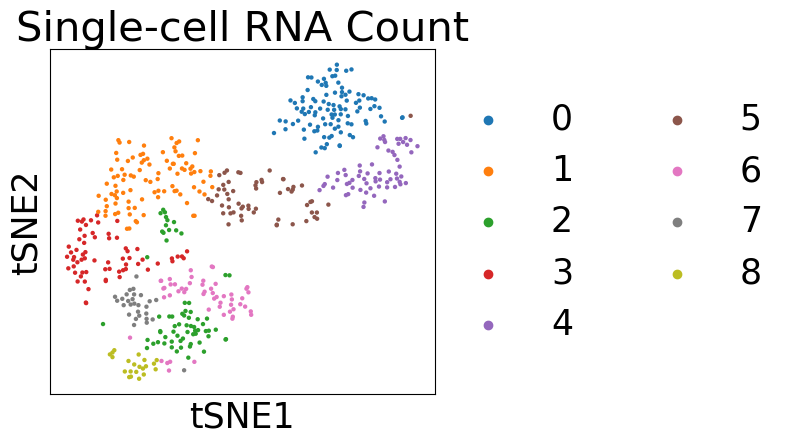

In [29]:
with rc_context({'figure.figsize':(5, 5), 'font.size':25}):
    sc.pl.tsne(count_adata, color=['leiden'], size=40, 
               add_outline=False,
               frameon=True,  title='Single-cell RNA Count', show=False)
            #    save=r' hydrogel_single_cell_count_clustering_legend side.png')
    # Retrieve the current figure
    fig = plt.gcf()

    # Customize the legend to be in two columns
    handles, labels = fig.axes[0].get_legend_handles_labels()
    fig.axes[0].legend_.remove()
    fig.legend(handles, labels, loc='center left', ncol=2, frameon=False,bbox_to_anchor=(0.9, 0.5))
    plt.tight_layout()
    plt.savefig(r'.\figures\hydrogel_single_cell_count_clustering_legend_side.png', dpi=300)
    plt.show()

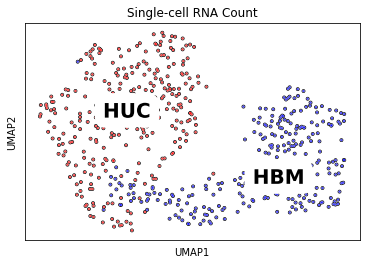

In [4]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(count_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Single-cell RNA Count')
               # save=r' hydrogel_single_cell_count_cellTypes.png')

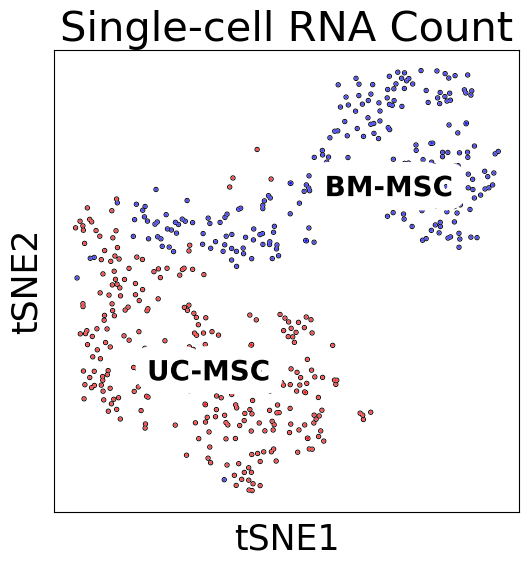

In [83]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(count_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Single-cell RNA Count',
               save=r' hydrogel_single_cell_count_cellTypes.png')

In [205]:
sc.tl.rank_genes_groups(count_adata,groupby='cell_types')

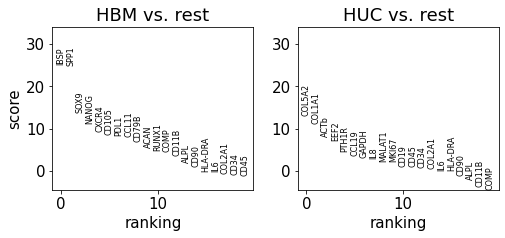

In [214]:
with rc_context({'figure.figsize':(4, 3), 'font.size':15}):
    sc.pl.rank_genes_groups(count_adata,groupby=['cell_types'], save=' single_cell_count.png')

In [19]:
sc.tl.rank_genes_groups(count_adata,groupby='leiden')

c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\Users\zfang38\A

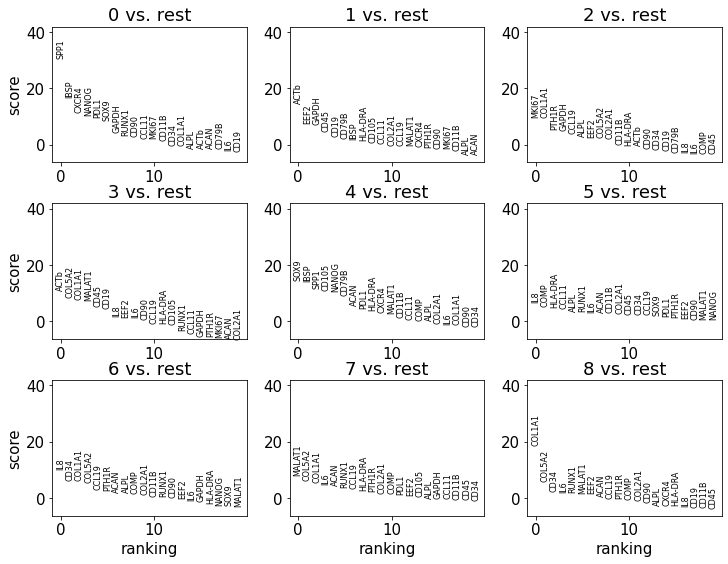

In [21]:
with rc_context({'figure.figsize':(4, 3), 'font.size':15}):
    sc.pl.rank_genes_groups(count_adata,groupby=['leiden'], ncols=3, save=' single_cell_count_clustering.png')

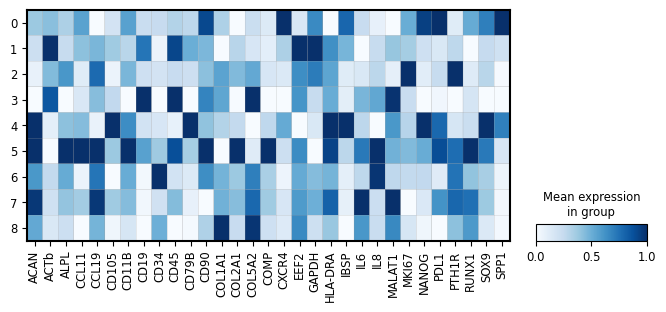

In [146]:
sc.pl.matrixplot(count_adata, count_adata.var_names, groupby='leiden',
                    dendrogram=False, cmap='Blues', standard_scale='var',
                    var_group_rotation=90, swap_axes=False, figsize=(8,3),
                    save=' single_cell_count.png')

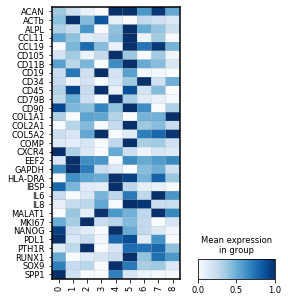

In [9]:
sc.pl.matrixplot(count_adata, count_adata.var_names, groupby='leiden',
                    dendrogram=False, cmap='Blues', standard_scale='var',
                    var_group_rotation=90, swap_axes=True, figsize=(4,5),
                    save=' single_cell_count_axis_swap.png')

In [251]:
count_adata.write_h5ad(r'.\results\count_adata.h5ad')

In [51]:
count_type = count_adata.obs['cell_types']
count_cluster = count_adata.obs['leiden']

# Patch correlation clustering

In [147]:
patch_corrs = []
cells = []
for cell in tqdm(cell_l):
    if cell.endswith('.csv'):
        cell_df = pd.read_csv(os.path.join(cell_df_dir,cell))
        patch_count = util.counting(cell_df,'patch','gene')
        patch_count = patch_count.drop(columns=['Count_id'])
        patch_corrs.append(patch_count.corr(method='pearson'))
        cells.append(cell.split('.')[0])

100%|████████████████████████████████████████████████████████████████████████████████| 554/554 [02:09<00:00,  4.27it/s]


In [148]:
markers = patch_corrs[0].columns.tolist()
pairs = []
for i in range(len(markers)):
    for j in range(len(markers)):
        if not ((markers[i]+'_'+markers[j] in pairs) or (markers[j]+'_'+markers[i] in pairs) or (markers[i]==markers[j])):
            pairs.append(markers[i]+'_'+markers[j])

In [149]:
corrs = np.zeros((len(patch_corrs),len(pairs)))
for i in range(len(patch_corrs)):
    patch_corr = patch_corrs[i]
    for j in range(len(pairs)):
        pair = pairs[j]
        [g1,g2] = pair.split('_')
        if g1 in patch_corr.columns.tolist() and g2 in patch_corr.columns.tolist():
            corrs[i,j] = patch_corr.loc[g1,g2]
        else:
            corrs[i,j] = 0

In [150]:
corrs_df = pd.DataFrame(corrs,columns=pairs,index=cells)

In [164]:
corr_adata = sc.AnnData(corrs)
corr_adata.var_names = pairs
corr_adata.obs['cell_id'] = cells
corr_adata.obs['cell_types'] = cell_types
corr_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [165]:
sc.pp.neighbors(corr_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [166]:
sc.tl.tsne(corr_adata)
sc.tl.umap(corr_adata)

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [167]:
sc.tl.leiden(corr_adata,resolution=1)

In [10]:
corr_adata = sc.read_h5ad(r'.\results\corr_adata.h5ad')

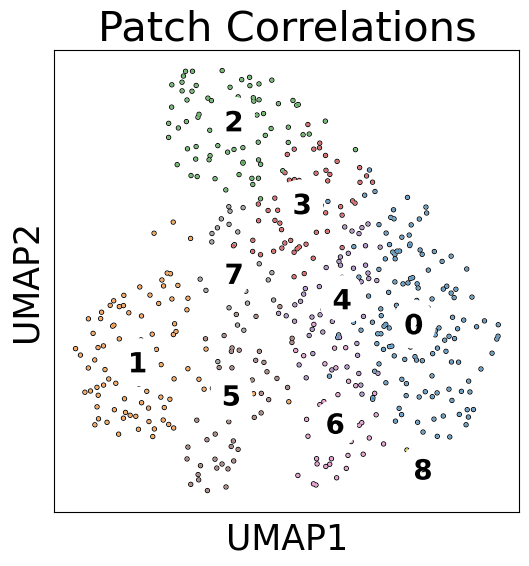

In [149]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(corr_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Patch Correlations',
               save=' hydrogel_patch_correlation_clustering.png')

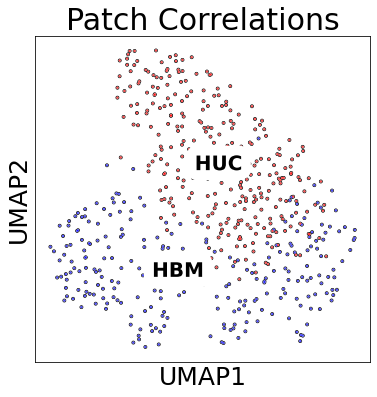

In [217]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(corr_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Patch Correlations',
               save=' hydrogel_patch_correlation_cellTypes.png')

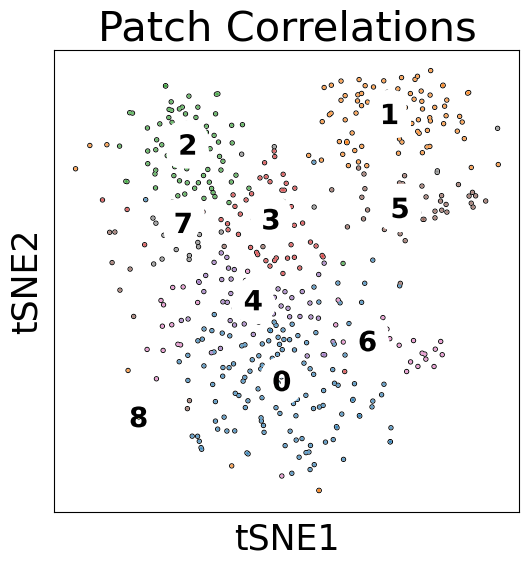

In [148]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(corr_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Patch Correlations',
               save=' hydrogel_patch_correlation_clustering.png')

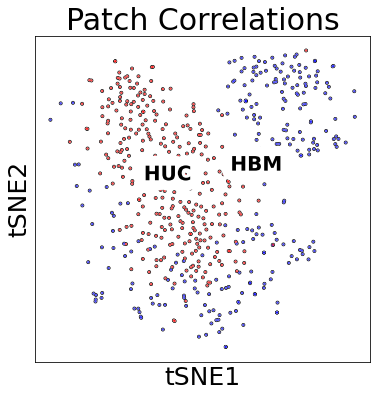

In [219]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(corr_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Patch Correlations',
               save=' hydrogel_patch_correlation_cellTypes.png')

In [220]:
sc.tl.rank_genes_groups(corr_adata,groupby='cell_types')

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


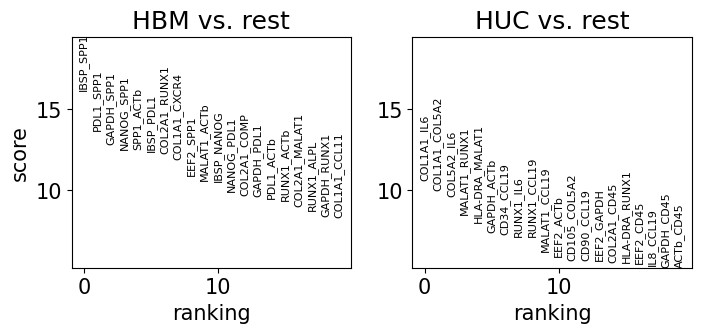

In [151]:
with rc_context({'figure.figsize':(4, 3), 'font.size':15}):
    sc.pl.rank_genes_groups(corr_adata,groupby=['cell_types'], save=' hydrogel_patch_correlation.png')

In [13]:
sc.tl.rank_genes_groups(corr_adata,groupby='leiden')

c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Us

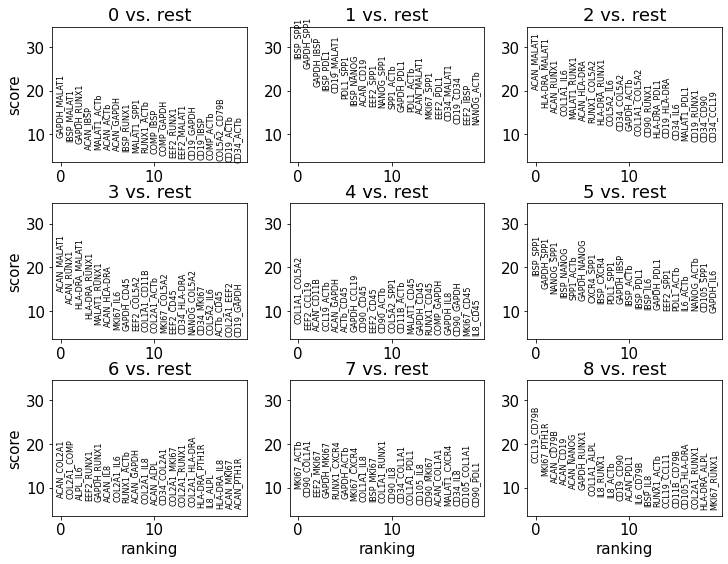

In [17]:
with rc_context({'figure.figsize':(4, 3), 'font.size':15}):
    sc.pl.rank_genes_groups(corr_adata,groupby=['leiden'], ncols=3, save=' hydrogel_patch_correlation_clustering.png')

In [253]:
corr_adata.write_h5ad(r'.\results\corr_adata.h5ad')

In [55]:
corr_type = corr_adata.obs['cell_types']
corr_cluster = corr_adata.obs['leiden']

# Network Variability

In [222]:
in_dir = r'Y:\coskun-lab\Zhou\4_HCR\20220211_MSC_hydrogel\00_analysis\spagnn\networks\proximity_scores\networks'
fn_l = os.listdir(in_dir)
var_names = []
arr = []
for fn in tqdm(fn_l):
    l = pd.read_pickle(os.path.join(in_dir, fn))
    temp = []
    m = np.zeros(len(pairs))
    s = np.zeros(len(pairs))
    for j in range(len(pairs)):
        gene1,gene2 = pairs[j].split('_')
        temp.append([])
        for i in range(len(l)):
            if l[i] is None:
                continue
            if (gene1 in l[i][0].columns.tolist()) and (gene2 in l[i][0].columns.tolist()):
                temp[j].append(l[i][0].loc[gene1,gene2])
        if len(temp[j])!=0:
            m[j] = np.mean(np.array(temp[j]))
            s[j] = np.std(np.array(temp[j]))
    arr.append(np.concatenate((m,s)))

 50%|███████████████████████████████████████▋                                        | 274/553 [01:31<01:40,  2.77it/s]C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
 53%|██████████████████████████████████████████▌                                     | 294/553 [01:41<01:37,  2.64it/s]C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
 77%|█████████████████████████████████████████████████████████████▍                  | 425/553 [02:31<00:50,  2.56it/s]C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
100%|████████████████████████████████████████████████████████████████████████████████| 553/553 [03:16<00:00,  2.82it/s]


In [223]:
arr = np.array(arr)
var_names = []
for p in pairs:
    var_names.append(p+'_mean')
    var_names.append(p+'_std')
df = pd.DataFrame(arr, columns=var_names)

In [225]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [226]:
df.dropna(axis=1,inplace=True)

In [227]:
df

ACAN_CD105_mean  ACAN_CD105_std  ACAN_CD19_mean  ACAN_CD19_std  \
0           0.323287       -0.585326        0.198876       0.009957   
1           0.476066        0.733297        0.117988       0.520740   
2           0.392850       -0.030676       -0.001777      -0.440999   
3          -0.410128        0.090194        1.255076      -0.082272   
4           0.127751        0.003170        0.217702      -0.305675   
..               ...             ...             ...            ...   
548         0.606210        1.378080        0.260873       0.106262   
549         0.545939        1.141782        0.480339      -0.168741   
550         0.549254        1.152183        0.090337       0.222964   
551         0.572155        1.008989        0.801096       0.113744   
552         0.324213        0.632900        0.293077       0.314733   

     ACAN_CD34_mean  ACAN_CD34_std  ACAN_CD90_mean  ACAN_CD90_std  \
0          1.025795      -0.304031       -0.483740      -0.113912   
1         -0.190793      -0.452498       -0.402923      -0.213338   
2          0.223617      -0.046667       -0.141217      -0.219333   
3          0.034115       0.089217       -0.320420      -0.561073   
4          0.617524      -0.136126       -0.127829      -0.036658   
..              ...            ...             ...            ...   
548       -0.644586      -0.162209        1.281536      -0.298643   
549       -0.496407      -0.345819        0.276643      -0.356627   
550       -0.257703      -0.379471        1.492463      -0.395839   
551       -0.116442       0.031089        1.828916      -0.366897   
552       -0.216109      -0.120148        1.642455      -0.023871   

     ACAN_COL1A1_mean  ACAN_COL1A1_std  ...  CCL11_CD79B_std  CCL11_ACTb_mean  \
0            0.132348         0.504524  ...         0.075907         1.469588   
1           -0.431328         1.100649  ...         1.596940         0.072748   
2            0.038575         0.482778  ...         1.104328         1.125908   
3            0.324892         1.702195  ...         0.935704         1.543853   
4            0.110097         0.502103  ...         1.249289         1.217362   
..                ...              ...  ...              ...              ...   
548         -0.757974         4.172256  ...         1.483784         0.882892   
549         -0.625142         3.315955  ...         1.158645         0.686060   
550         -1.176517         6.079758  ...         1.141006         0.988777   
551         -0.828792         5.193655  ...         1.373135         0.945025   
552         -0.557485         4.784209  ...         1.244827         1.505839   

     CCL11_ACTb_std  CCL11_CD45_mean  CCL11_CD45_std  CD79B_ACTb_mean  \
0          0.996980         0.041487        0.058034         0.000000   
1          0.275587         1.105935        0.521115         0.094547   
2          1.248282         1.547682        1.113171         1.237944   
3          0.722623         1.022249        0.922293         0.504700   
4          1.035402         1.421636        0.856006         0.951372   
..              ...              ...             ...              ...   
548        0.966973         1.119037        0.711273         0.977943   
549        0.151551         1.110480        0.339325         0.922926   
550        1.025397         1.225453        0.912404         1.062810   
551        1.283334         1.490179        0.967689         1.116144   
552        1.308884         1.303456        1.666654         0.926222   

     CD79B_ACTb_std  CD79B_CD45_std  ACTb_CD45_mean  ACTb_CD45_std  
0          0.000000        0.071103        0.079757       0.112715  
1          0.008943        0.662286        1.498821       0.746656  
2          1.124356        1.151435        0.865927       0.924733  
3          0.992641        1.057272        1.661022       0.674006  
4          1.051494        1.394799        0.922787       1.163735  
..              ...             ...             ...        

In [228]:
var_adata = sc.AnnData(df.values)
var_adata.var_names = df.columns.tolist()
var_adata.obs['cell_id'] = cells
var_adata.obs['cell_types'] = cell_types
var_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [229]:
sc.pp.neighbors(var_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [230]:
sc.tl.tsne(var_adata)
sc.tl.umap(var_adata)

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [244]:
sc.tl.leiden(var_adata,resolution=0.46)

In [73]:
var_adata = sc.read_h5ad(r'.\results\var_adata.h5ad')

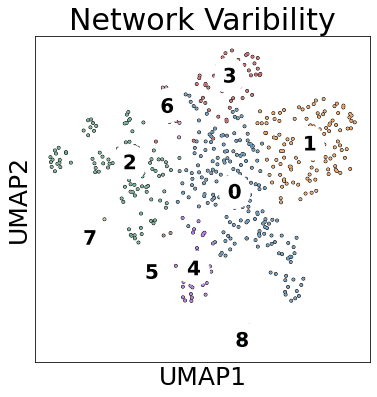

In [245]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(var_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Varibility',
               save=' hydrogel_network_variability_clustering.png')

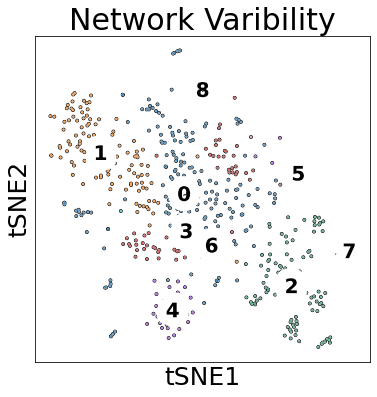

In [246]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(var_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Varibility',
               save=' hydrogel_network_variability_clustering.png')

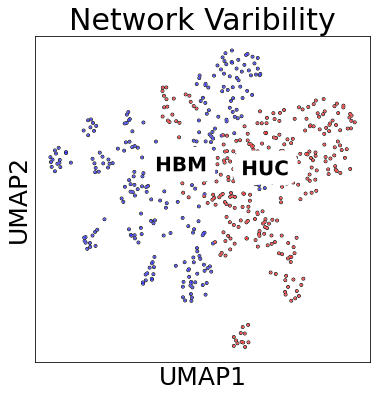

In [247]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(var_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Varibility',
               save=' hydrogel_network_variability_cellTypes.png')

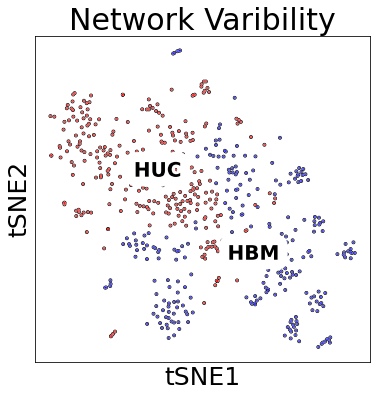

In [248]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(var_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Varibility',
               save=' hydrogel_network_variability_cellTypes.png')

In [249]:
sc.tl.rank_genes_groups(var_adata,groupby='cell_types')

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:421: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


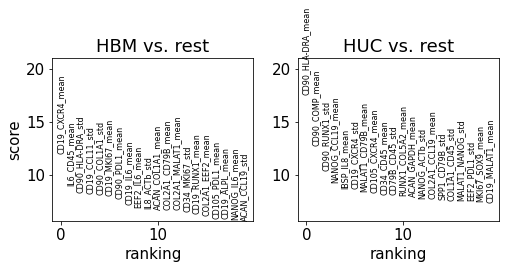

In [250]:
with rc_context({'figure.figsize':(4, 3), 'font.size':15}):
    sc.pl.rank_genes_groups(var_adata,groupby=['cell_types'], save=' hydrogel_network_variability.png')

In [254]:
var_adata.write_h5ad(r'.\results\var_adata.h5ad')

In [57]:
var_type = var_adata.obs['cell_types']
var_cluster = var_adata.obs['leiden']

# gae embedding clustering

In [8]:
embedding = pd.read_csv(r'./results/gae_hyperparameter/200_100_embedded_features.csv',index_col=0)

In [9]:
# pooling
cellID = []
for item in embedding.index.tolist():
    temp = item.split('_')
    cellID.append(temp[0]+'_'+temp[1]+'_'+temp[2])

embedding.insert(loc=embedding.shape[1],column='cellID',value=cellID)
embedding_by_cell = embedding.groupby('cellID')
pooled_features = embedding_by_cell.mean()

# y label
cell_types = []
for item in pooled_features.index.tolist():
    if item.split('_')[0] == 'bm':
        cell_types.append('BM-MSC')
    else:
        cell_types.append('UC-MSC')

In [10]:
x = pooled_features.values.astype('float')

In [11]:
embedding_adata = sc.AnnData(x)
embedding_adata.obs['cell_id'] = pooled_features.index.tolist()
embedding_adata.obs['cell_types'] = cell_types
embedding_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [12]:
sc.pp.neighbors(embedding_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\umap\distances.py:1086: NumbaDepr

In [13]:
sc.tl.tsne(embedding_adata)
sc.tl.umap(embedding_adata)

c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [14]:
sc.tl.leiden(embedding_adata,resolution=0.7)

In [15]:
# embedding_adata = sc.read_h5ad(r'.\results\embedding_adata.h5ad')

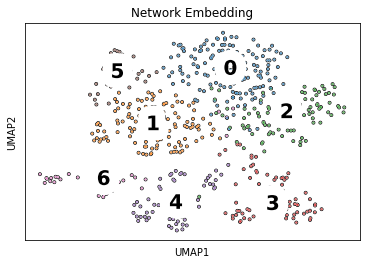

In [16]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(embedding_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding_clustering.png')

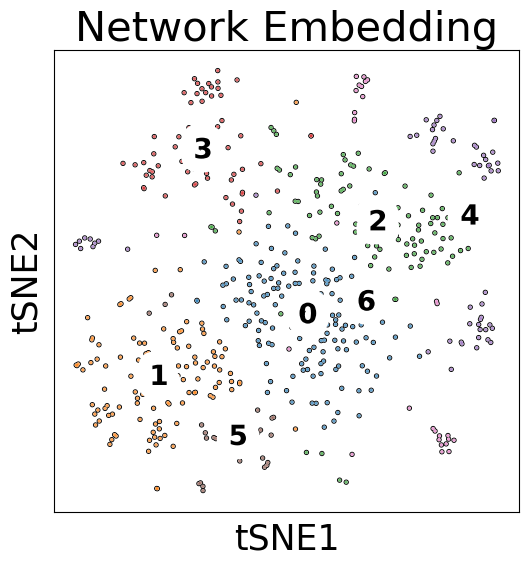

In [17]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(embedding_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding_clustering.png')

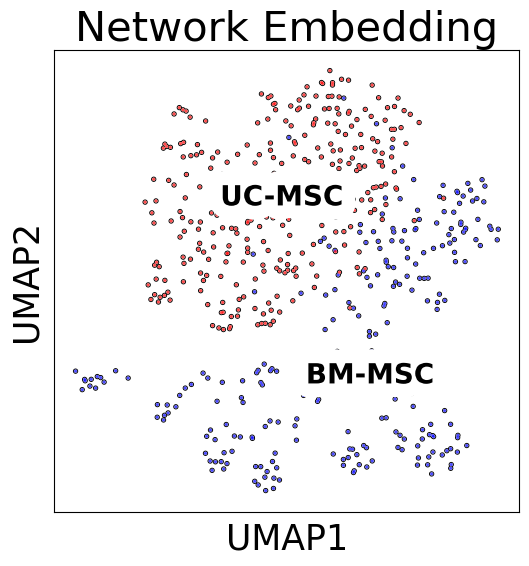

In [18]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(embedding_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding_cellTypes.png')

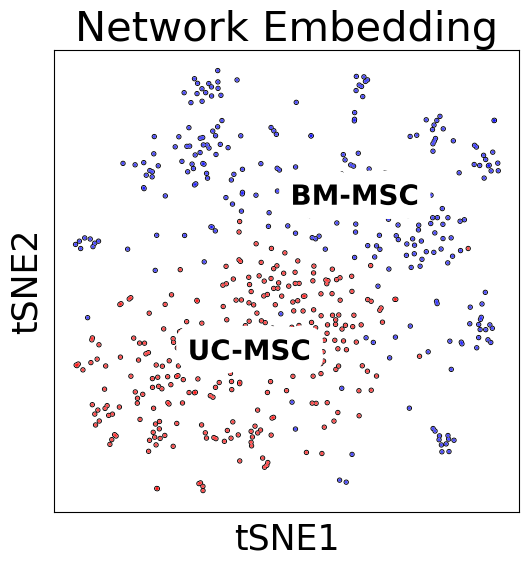

In [19]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(embedding_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding_cellTypes.png')

In [20]:
# sc.tl.dendrogram(embedding_adata,groupby=['leiden'])

In [21]:
# sc.pl.heatmap(embedding_adata,var_names=embedding_adata.var_names,groupby=['leiden'],dendrogram=True,log=True,save=' embedding clustering.png')

In [22]:
embedding_adata.write_h5ad(r'.\results\embedding_adata.h5ad')

In [23]:
embedding_type = embedding_adata.obs['cell_types']
embedding_cluster = embedding_adata.obs['leiden']

In [24]:
sc.tl.rank_genes_groups(embedding_adata,groupby='cell_types')

c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
c:\Users\zfang38\Anaconda3\envs\skim\lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


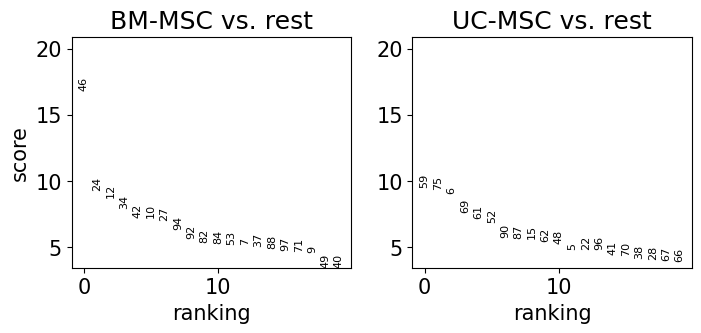

In [25]:
with rc_context({'figure.figsize':(4, 3), 'font.size':15}):
    sc.pl.rank_genes_groups(embedding_adata,groupby=['cell_types'], save=' hydrogel_network_embedding.png')

In [26]:
# Plot features 46, 24, 59, 75
data = {'Cell Type':[], 'Value':[], 'Feature':[]}
cell_type_l = []
for item in pooled_features.index.tolist():
    cell_type_l.append(item.split('_')[0])
# pooled_features.insert(loc=pooled_features.shape[1],column='cell_type',value=cell_type_l)
for col in ['24','46','59','75']:
    data['Cell Type'] = data['Cell Type'] + cell_type_l
    data['Value'] = data['Value'] + pooled_features[col].tolist()
    data['Feature'] = data['Feature'] + [col]*len(cell_type_l)
data = pd.DataFrame(data)

In [27]:
channel_pairs = data["Feature"].unique()

In [28]:
from statannot import add_stat_annotation
import seaborn as sns

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



ValueError: box_pairs contains an invalid box pair.

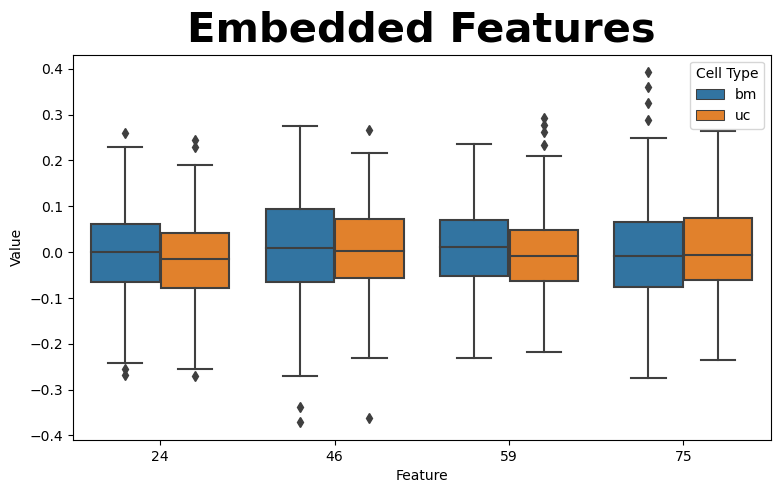

In [29]:
channel_pairs = data["Feature"].unique()
hue = "Cell Type"
x = "Feature"
metrics = data["Feature"].unique()
y = "Value"
hue_order=['HBM', 'HUC']
plt.figure(figsize=(9, 5))
plt.title('Embedded Features',fontsize= 30, pad=10, fontweight ="bold")

box_pairs = [(('HBM','24'),('HUC','24')),(('HBM','46'),('HUC','46')),
             (('HBM','59'),('HUC','59')),(('HBM','75'),('HUC','75'))]

g = sns.boxplot(data=data, hue=hue, x=x, y=y)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)

add_stat_annotation(g, data=data, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, comparisons_correction =None)
g.figure.axes[-1].yaxis.label.set_size(20)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_xlabel("Embedded Featurs",fontsize=20)
g.set_ylabel("Embedding Values",fontsize=20)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title='Cell Type', fontsize=16, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(r'.\figures\Logistic regression cv scores.png', bbox_inches="tight")
plt.show()

## Embedding features PCA analysis

In [30]:
sc.tl.pca(embedding_adata,n_comps=50)

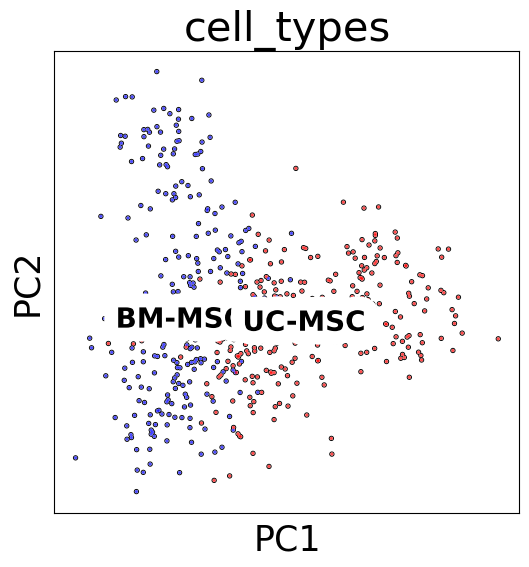

In [31]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.pca(embedding_adata,color=['cell_types'],size=20,
              legend_loc='on data',add_outline=True,legend_fontsize=20,
              legend_fontoutline=20,frameon=True, save=' hydrogel_network_embedding_pca_cellTypes.png')

In [32]:
embedding_adata

AnnData object with n_obs × n_vars = 553 × 100
    obs: 'cell_id', 'cell_types', 'leiden'
    uns: 'cell_types_colors', 'neighbors', 'tsne', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups', 'pca'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [33]:
embedding_adata.varm['PCs'].shape

(100, 50)

In [34]:
pc1 = embedding_adata.varm['PCs'][:,0]

In [35]:
pc1_pos = [46,24,71,78,12]
pc1_neg = [75,59,96,6,87]

In [36]:
sig_feat = embedding_adata.X[:,pc1_pos+pc1_neg]

In [37]:
sig_feat = pd.DataFrame(sig_feat,columns=pc1_pos+pc1_neg)

In [38]:
data = sig_feat.melt()

In [39]:
data.insert(loc=data.shape[1],column='cell_type',value=embedding_adata.obs['cell_types'].tolist()*10)

In [40]:
data.rename(columns={'variable': 'Feature', 'cell_type': 'Cell Type'}, inplace=True)

In [46]:
box_pairs

[(('46', 'BM-MSC'), ('46', 'UC-MSC')),
 (('24', 'BM-MSC'), ('24', 'UC-MSC')),
 (('71', 'BM-MSC'), ('71', 'UC-MSC')),
 (('78', 'BM-MSC'), ('78', 'UC-MSC')),
 (('12', 'BM-MSC'), ('12', 'UC-MSC')),
 (('75', 'BM-MSC'), ('75', 'UC-MSC')),
 (('59', 'BM-MSC'), ('59', 'UC-MSC')),
 (('96', 'BM-MSC'), ('96', 'UC-MSC')),
 (('6', 'BM-MSC'), ('6', 'UC-MSC')),
 (('87', 'BM-MSC'), ('87', 'UC-MSC'))]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

96_BM-MSC v.s. 96_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=3.327e-06 U_stat=2.937e+04
87_BM-MSC v.s. 87_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.027e-09 U_stat=2.664e+04
12_BM-MSC v.s. 12_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.895e-16 U_stat=5.352e+04
6_BM-MSC v.s. 6_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.643e-19 U_stat=2.115e+04
24_BM-MSC v.s. 24_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=2.516e-18 U_stat=5.446e+04
46_BM-MSC v.s. 46_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=1.420e-44 U_stat=6.436e+04
71_BM-MSC v.s. 71_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=8.229e-06 U_stat=4.645e+04
78_BM-MSC v.s. 78_UC-MSC: Mann-Whitney-Wilcoxon test two-sided, P_val=2.106e-03 U_stat=4.386e+04
75_BM-MSC v.s. 75_UC-MSC: Mann-Whitney-Wilcoxon test two-sided

C:\Users\zfang38\AppData\Local\Temp\ipykernel_239596\1741030680.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)


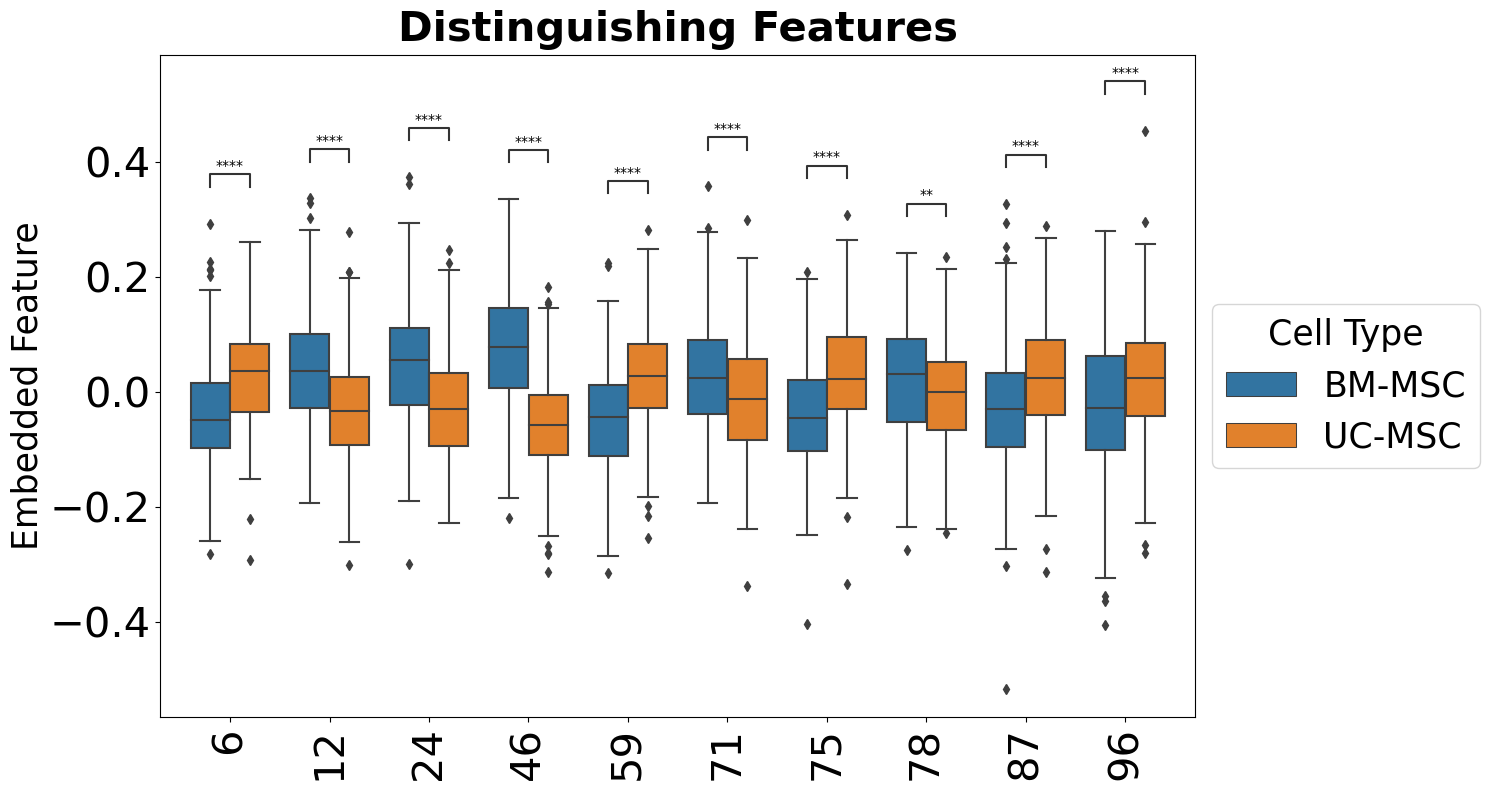

In [48]:
channel_pairs = data["Feature"].unique()
hue = "Cell Type"
x = "Feature"
y = "value"
hue_order=['BM-MSC', 'UC-MSC']
plt.figure(figsize=(15, 8))
plt.title('Distinguishing Features',fontsize= 30, pad=10, fontweight ="bold")

box_pairs=[((chan, "BM-MSC"), (chan, "UC-MSC")) for chan in channel_pairs]

g = sns.boxplot(data=data, hue=hue, x=x, y=y) 
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

add_stat_annotation(g, data=data, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, comparisons_correction =None)
g.figure.axes[-1].yaxis.label.set_size(20)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30, rotation=90)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_title(f'Distinguishing Features',fontsize= 30, pad=10, fontweight ="bold")
g.set_xlabel("",fontsize=1)
g.set_ylabel("Embedded Feature",fontsize=25)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title='Cell Type', fontsize=25, title_fontsize=25, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(r'.\figures\bm uc embedding features.png', bbox_inches="tight")
plt.show()

# Co clustering plotting

In [81]:
count_adata.obs['correlation_leiden'] = corr_adata.obs['leiden']
count_adata.uns['correlation_leiden_colors'] = corr_adata.uns['leiden_colors']

count_adata.obs['variability_leiden'] = var_adata.obs['leiden']
count_adata.uns['variability_leiden_colors'] = var_adata.uns['leiden_colors']

count_adata.obs['embedding_leiden'] = embedding_adata.obs['leiden']
count_adata.uns['embedding_leiden_colors'] = embedding_adata.uns['leiden_colors']

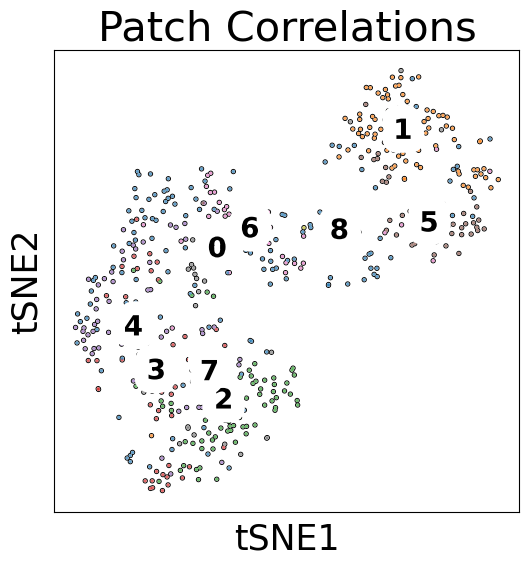

In [89]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(count_adata, color=['correlation_leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Patch Correlations',
               save=r' hydrogel_single_cell_count_patch_clustering.png')

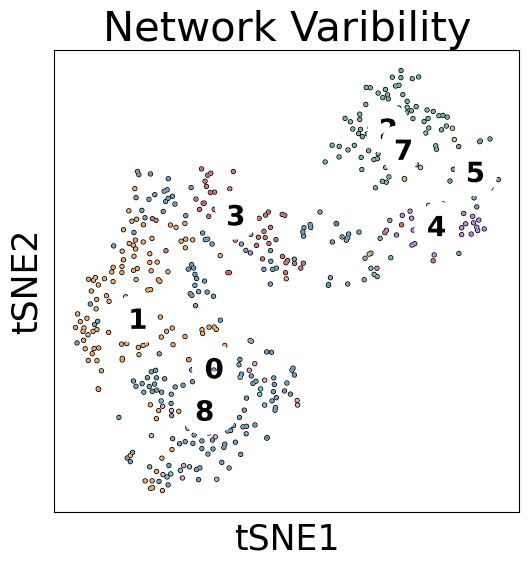

In [90]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(count_adata, color=['variability_leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Varibility',
               save=r' hydrogel_single_cell_count_variability_clustering.png')

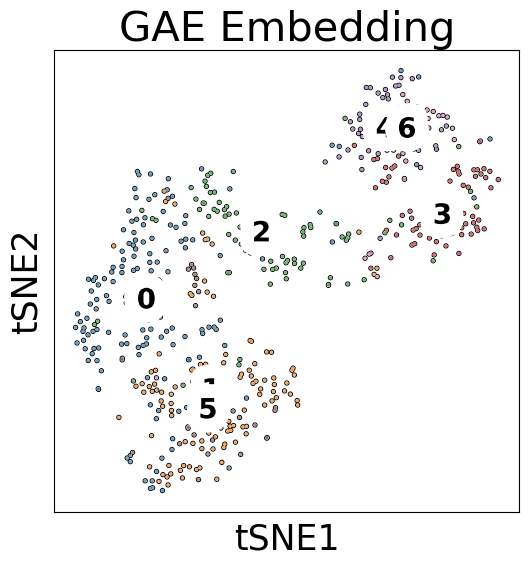

In [91]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(count_adata, color=['embedding_leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='GAE Embedding',
               save=r' hydrogel_single_cell_count_embedding_clustering.png')

In [93]:
count_adata.write_h5ad(r'.\results\count_adata.h5ad')

In [96]:
count_adata.obsm['X_tsne']

array([[  8.868031 ,  -3.3150928],
       [  8.882203 ,  -3.1879377],
       [ 14.33466  ,  24.242184 ],
       ...,
       [-25.17167  ,  -6.8995194],
       [ -9.660682 , -10.071799 ],
       [-24.80064  , -12.849285 ]], dtype=float32)

In [98]:
coclustering = {'tsne_x':count_adata.obsm['X_tsne'][:,0],
                'tsne_y':count_adata.obsm['X_tsne'][:,1],
                'count_cluster':count_adata.obs['leiden'].tolist(),
                'corr_cluster':corr_adata.obs['leiden'].tolist(),
                'variability_cluster':var_adata.obs['leiden'].tolist(),
                'embedding_cluster':embedding_adata.obs['leiden'].tolist()}
coclustering_df = pd.DataFrame(coclustering)

In [135]:
coclustering_df.insert(loc=0,column='cell_id',value=count_adata.obs['cell_id'].tolist())

In [100]:
cell_by_count = coclustering_df.groupby(['count_cluster'])

In [136]:
coclustering_df.to_csv(r'.\results\coclustering_df.csv')

In [107]:
temp = coclustering_df['count_cluster'].unique()
temp.sort()

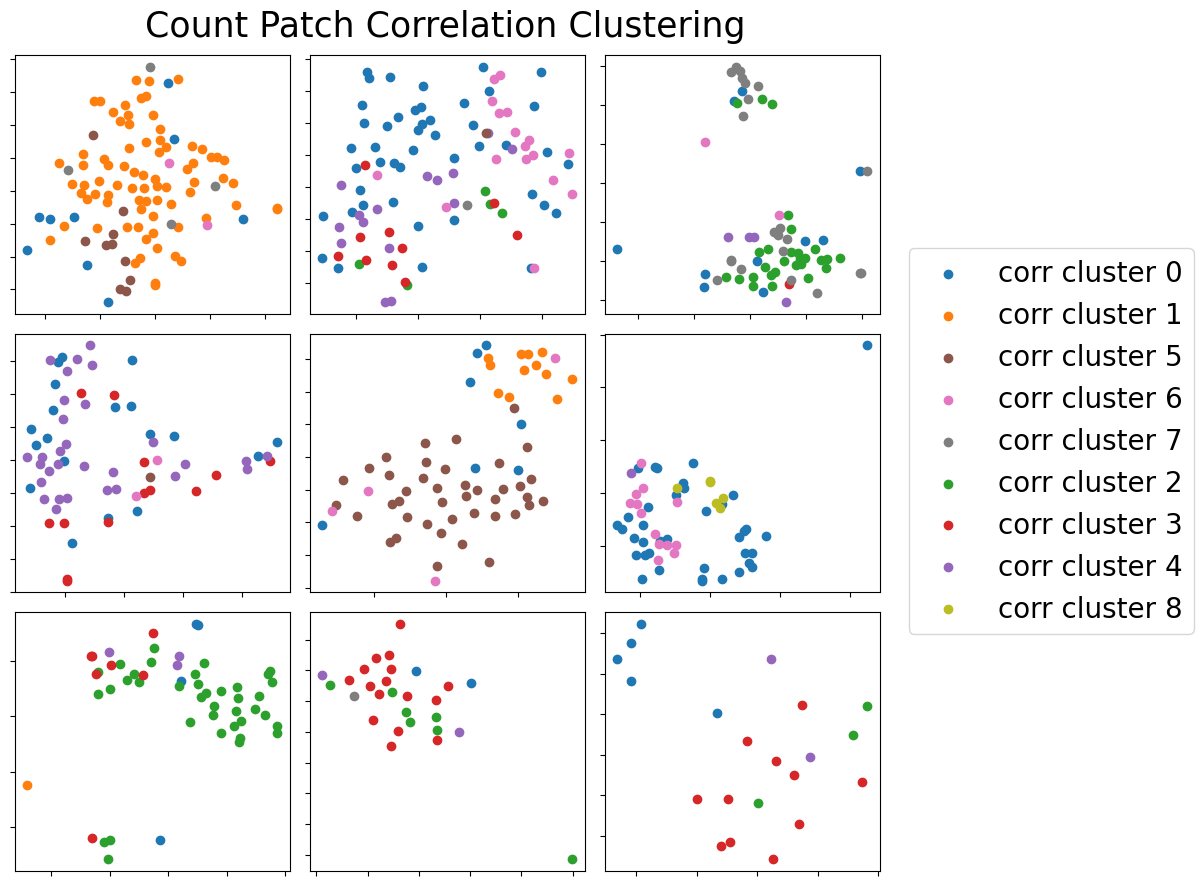

In [130]:
fig,axes = plt.subplots(3,3,figsize=(9,9))
axes = axes.flatten()
for i in range(len(axes)):
    sub_df = cell_by_count.get_group(temp[i])
    sub_by_corr = sub_df.groupby(['corr_cluster'])
    corr_keys = sub_df['corr_cluster'].unique()
    corr_keys.sort()
    for j in corr_keys:
        sub_sub_df = sub_by_corr.get_group(j)
        axes[i].scatter(sub_sub_df['tsne_x'],sub_sub_df['tsne_y'],c=corr_adata.uns['leiden_colors'][int(j)],label='corr cluster '+str(j))
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])
handles = []
labels = []
for i in range(len(axes)):
    h, l = axes[i].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

unique_labels = []
unique_handles = []
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_labels.append(l)
        unique_handles.append(h)
fig.legend(unique_handles,unique_labels,fontsize=20,bbox_to_anchor=(1, 0.5),loc='center left')
fig.suptitle('Count Patch Correlation Clustering',fontsize=25)
plt.tight_layout()
plt.savefig(r'.\figures\count_patch_correlation_clustering.png',bbox_inches='tight')
plt.show()


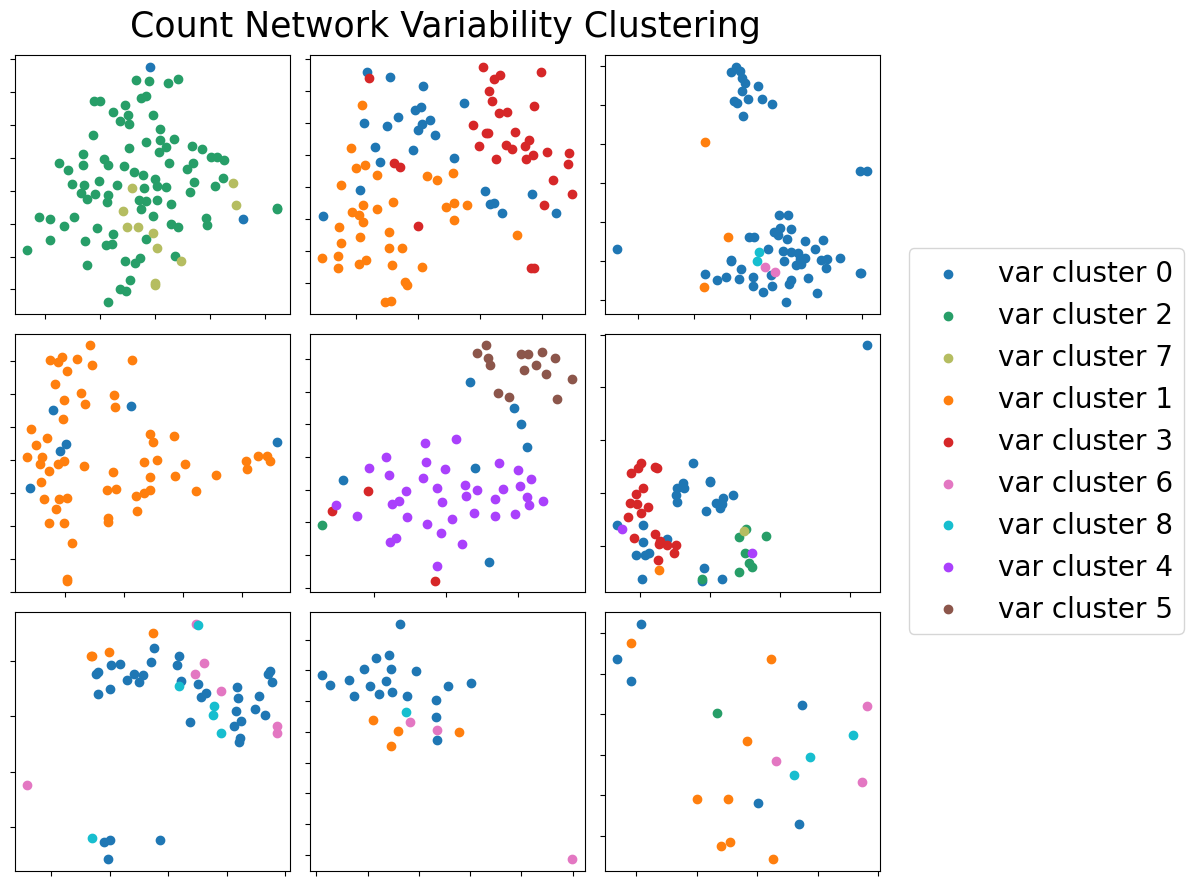

In [131]:
fig,axes = plt.subplots(3,3,figsize=(9,9))
axes = axes.flatten()
for i in range(len(axes)):
    sub_df = cell_by_count.get_group(temp[i])
    sub_by_var = sub_df.groupby(['variability_cluster'])
    corr_keys = sub_df['variability_cluster'].unique()
    corr_keys.sort()
    for j in corr_keys:
        sub_sub_df = sub_by_var.get_group(j)
        axes[i].scatter(sub_sub_df['tsne_x'],sub_sub_df['tsne_y'],c=var_adata.uns['leiden_colors'][int(j)],label='var cluster '+str(j))
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])
handles = []
labels = []
for i in range(len(axes)):
    h, l = axes[i].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

unique_labels = []
unique_handles = []
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_labels.append(l)
        unique_handles.append(h)
fig.legend(unique_handles,unique_labels,fontsize=20,bbox_to_anchor=(1, 0.5),loc='center left')
fig.suptitle('Count Network Variability Clustering',fontsize=25)
plt.tight_layout()
plt.savefig(r'.\figures\count_network_variability_clustering.png',bbox_inches='tight')
plt.show()


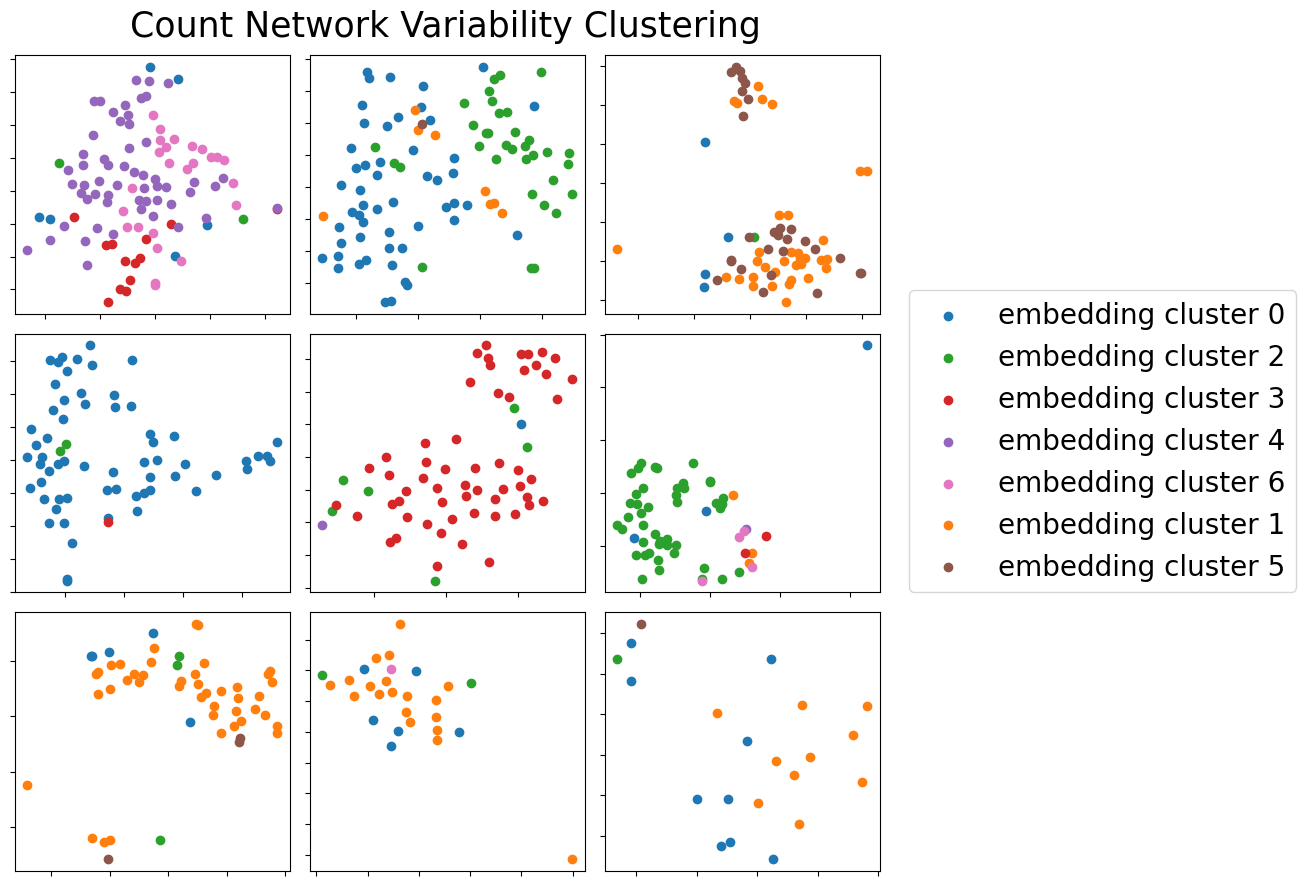

In [132]:
fig,axes = plt.subplots(3,3,figsize=(9,9))
axes = axes.flatten()
for i in range(len(axes)):
    sub_df = cell_by_count.get_group(temp[i])
    sub_by_gae = sub_df.groupby(['embedding_cluster'])
    corr_keys = sub_df['embedding_cluster'].unique()
    corr_keys.sort()
    for j in corr_keys:
        sub_sub_df = sub_by_gae.get_group(j)
        axes[i].scatter(sub_sub_df['tsne_x'],sub_sub_df['tsne_y'],c=embedding_adata.uns['leiden_colors'][int(j)],label='embedding cluster '+str(j))
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])
handles = []
labels = []
for i in range(len(axes)):
    h, l = axes[i].get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

unique_labels = []
unique_handles = []
for h, l in zip(handles, labels):
    if l not in unique_labels:
        unique_labels.append(l)
        unique_handles.append(h)
fig.legend(unique_handles,unique_labels,fontsize=20,bbox_to_anchor=(1, 0.5),loc='center left')
fig.suptitle('Count Network Variability Clustering',fontsize=25)
plt.tight_layout()
plt.savefig(r'.\figures\count_gae_embedding_clustering.png',bbox_inches='tight')
plt.show()


# graph embedding max pooling

In [126]:
embedding = pd.read_csv(r'./results/gae_embedded_features.csv',index_col=0)

In [127]:
row = embedding['row'].tolist()
col = embedding['col'].tolist()
z = embedding['z'].tolist()
cellID = embedding['cellID'].tolist()
embedding.drop(columns=['row','col','z'],inplace=True)

In [128]:
embedding_by_cell = embedding.groupby('cellID')
cells = np.sort(embedding['cellID'].unique())
pooled_features = []
cell_types = []
for cell in tqdm(cells):
    sub_group = embedding_by_cell.get_group(cell)
    pooled_features.append((sub_group.max().values[:50]).astype('float'))
    cell_types.append('H'+cell.split('_')[0].upper())

100%|██████████████████████████████████████████████████████████████████████████████| 553/553 [00:00<00:00, 1461.47it/s]


In [129]:
cell_types = pd.Categorical(cell_types,ordered=True, categories=['HBM','HUC'])
embedding_adata.obs['cell_types'] = cell_types
embedding_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [130]:
x = np.stack(pooled_features,axis=0)

In [131]:
embedding_max_adata = sc.AnnData(x)
embedding_max_adata.obs['cell_id'] = cells
embedding_max_adata.obs['cell_types'] = cell_types
embedding_max_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [133]:
sc.pp.neighbors(embedding_max_adata)

In [134]:
sc.tl.umap(embedding_max_adata)
sc.tl.tsne(embedding_max_adata)

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [137]:
sc.tl.leiden(embedding_max_adata,resolution=0.8)

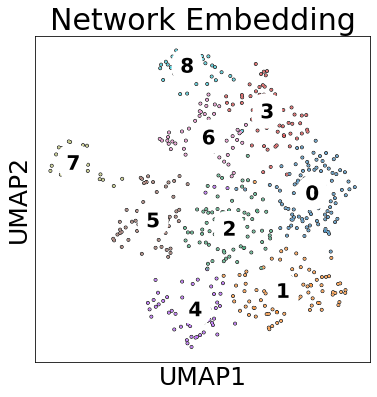

In [138]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(embedding_max_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding-max_clustering.png')

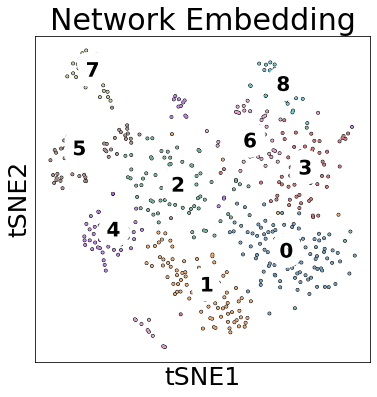

In [139]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(embedding_max_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding-max_clustering.png')

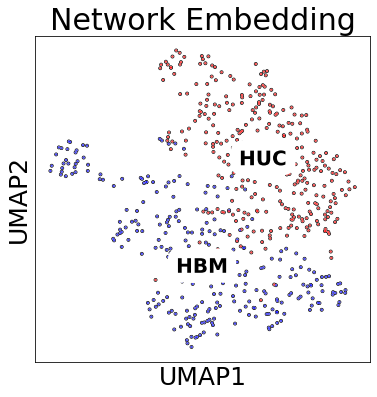

In [140]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(embedding_max_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding-max_cellTypes.png')

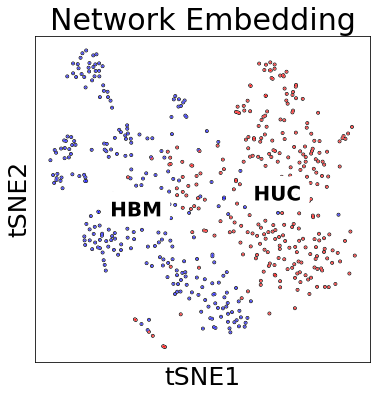

In [141]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(embedding_max_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_embedding-max_cellTypes.png')

In [142]:
embedding_max_adata.write_h5ad(r'.\results\embedding_max_adata.h5ad')

# VGAE embedding

In [272]:
vgae_embedding = pd.read_csv(r'./results/vgae_embedded_features.csv',index_col=0)

In [275]:
cell_id = []
for item in vgae_embedding['index']:
    temp = item.split('_')
    cell_id.append(temp[0]+'_'+temp[1]+'_'+temp[2])
vgae_embedding.insert(loc=0,column='cellID',value=cell_id)

In [277]:
index = vgae_embedding['index'].tolist()
vgae_embedding.drop(columns=['index'],inplace=True)

In [279]:
vgae_embedding_by_cell = vgae_embedding.groupby('cellID')
cells = np.sort(vgae_embedding['cellID'].unique())
pooled_features = []
cell_types = []
for cell in tqdm(cells):
    sub_group = vgae_embedding_by_cell.get_group(cell)
    pooled_features.append((sub_group.mean().values[:50]).astype('float'))
    cell_types.append('H'+cell.split('_')[0].upper())

  0%|                                                                                          | 0/553 [00:00<?, ?it/s]C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
100%|██████████████████████████████████████████████████████████████████████████████| 553/553 [00:00<00:00, 1517.65it/s]


In [280]:
cell_types = pd.Categorical(cell_types,ordered=True, categories=['HBM','HUC'])
embedding_adata.obs['cell_types'] = cell_types
embedding_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [281]:
x = np.stack(pooled_features,axis=0)

In [283]:
vgae_embedding_adata = sc.AnnData(x)
vgae_embedding_adata.obs['cell_id'] = cells
vgae_embedding_adata.obs['cell_types'] = cell_types
vgae_embedding_adata.uns['cell_types_colors'] = ['#0000ff', '#ff0000']

In [284]:
sc.pp.neighbors(vgae_embedding_adata)

In [285]:
sc.tl.umap(vgae_embedding_adata)
sc.tl.tsne(vgae_embedding_adata)

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [286]:
sc.tl.leiden(vgae_embedding_adata)

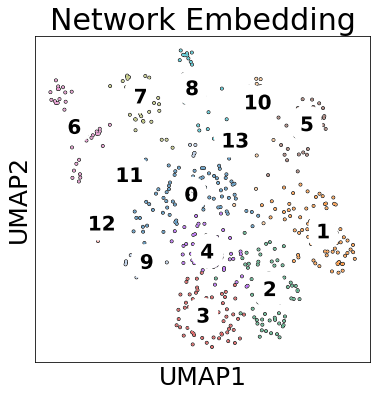

In [287]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(vgae_embedding_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_vgae_embedding_clustering.png')

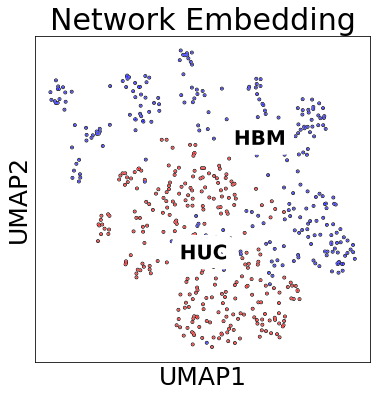

In [288]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.umap(vgae_embedding_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_vgae_embedding_cellTypes.png')

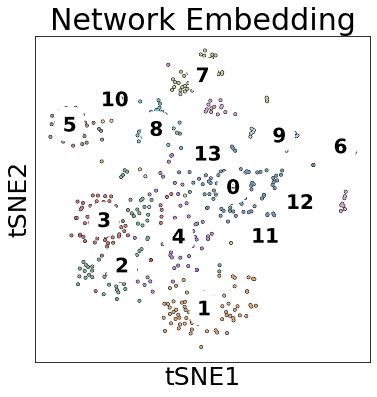

In [289]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(vgae_embedding_adata, color=['leiden'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_vgae_embedding_clustering.png')

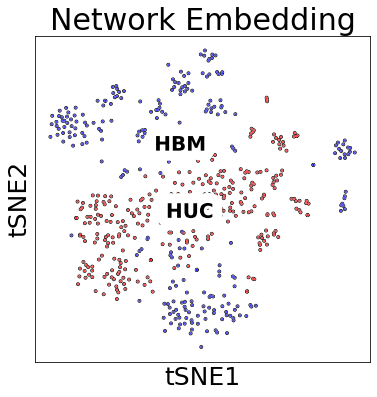

In [290]:
with rc_context({'figure.figsize':(6, 6), 'font.size':25}):
    sc.pl.tsne(vgae_embedding_adata, color=['cell_types'], size=20, 
               legend_loc='on data', add_outline=True, 
               legend_fontsize=20, legend_fontoutline=20, 
               frameon=True,  title='Network Embedding',
               save=' hydrogel_network_vgae_embedding_cellTypes.png')

In [291]:
vgae_embedding_adata.write_h5ad(r'.\results\vgae_embedding_adata.h5ad')

# svm performance comparison using rna count and embedding

In [4]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler

## count classification

In [259]:
count_x = count_adata.X
count_y = count_adata.obs['cell_types'].tolist()

In [260]:
count_x_train, count_x_test, count_y_train, count_y_test = train_test_split(count_x, count_y, test_size=0.2, random_state=42)

In [261]:
scaler = StandardScaler()
count_x_train = scaler.fit_transform(count_x_train)
count_x_test = scaler.transform(count_x_test)
clf = svm.SVC(kernel='linear')
clf.fit(count_x_train, count_y_train)

SVC(kernel='linear')

In [262]:
count_y_pred = clf.predict(count_x_test)

In [207]:
count_accuracy = accuracy_score(count_y_test, count_y_pred)
print("Accuracy:", count_accuracy)

Accuracy: 0.9279279279279279


In [208]:
count_auc = roc_auc_score(count_y_test, count_y_pred)
print('auc', count_auc)

C:\Users\zfang38\Anaconda3\envs\scenv\lib\site-packages\sklearn\metrics\_ranking.py:546: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_score = check_array(y_score, ensure_2d=False)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'

## embedding classification

In [209]:
embedding_x = embedding_adata.X
embedding_y = embedding_adata.obs['cell_types'].tolist()

In [210]:
embedding_x_train, embedding_x_test, embedding_y_train, embedding_y_test = train_test_split(embedding_x, embedding_y, test_size=0.2, random_state=42)

In [211]:
scaler = StandardScaler()
embedding_x_train = scaler.fit_transform(embedding_x_train)
embedding_x_test = scaler.transform(embedding_x_test)
clf = svm.SVC(kernel='linear')
clf.fit(embedding_x_train, embedding_y_train)

SVC(kernel='linear')

In [212]:
embedding_y_pred = clf.predict(embedding_x_test)

In [213]:
embedding_accuracy = accuracy_score(embedding_y_test, embedding_y_pred)
print("Accuracy:", embedding_accuracy)

Accuracy: 0.972972972972973


## embedding max pooling

In [261]:
embedding_max_x = embedding_max_adata.X
embedding_max_y = embedding_max_adata.obs['cell_types'].tolist()

In [262]:
embedding_max_x_train, embedding_max_x_test, embedding_max_y_train, embedding_max_y_test = train_test_split(embedding_max_x, embedding_max_y, test_size=0.2, random_state=42)

In [263]:
scaler = StandardScaler()
embedding_max_x_train = scaler.fit_transform(embedding_max_x_train)
embedding_max_x_test = scaler.transform(embedding_max_x_test)
clf = svm.SVC(kernel='linear')
clf.fit(embedding_max_x_train, embedding_max_y_train)

SVC(kernel='linear')

In [264]:
embedding_max_y_pred = clf.predict(embedding_max_x_test)

In [265]:
embedding_max_accuracy = accuracy_score(embedding_max_y_test, embedding_max_y_pred)
print("Accuracy:", embedding_max_accuracy)

Accuracy: 0.963963963963964


## Variability classification

In [214]:
var_x = var_adata.X
var_y = var_adata.obs['cell_types'].tolist()

In [215]:
var_x_train, var_x_test, var_y_train, var_y_test = train_test_split(var_x, var_y, test_size=0.2, random_state=42)

In [216]:
scaler = StandardScaler()
var_x_train = scaler.fit_transform(var_x_train)
var_x_test = scaler.transform(var_x_test)
clf = svm.SVC(kernel='linear')
clf.fit(var_x_train, var_y_train)

SVC(kernel='linear')

In [217]:
var_y_pred = clf.predict(var_x_test)

In [218]:
var_accuracy = accuracy_score(var_y_test, var_y_pred)
print("Accuracy:", var_accuracy)

Accuracy: 0.9459459459459459


# Multiple classifiers comparison

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [6]:
count_adata = sc.read_h5ad(r'.\results\count_adata.h5ad')
corr_adata = sc.read_h5ad(r'.\results\corr_adata.h5ad')
var_adata = sc.read_h5ad(r'.\results\var_adata.h5ad')
embedding_adata = sc.read_h5ad(r'.\results\embedding_adata.h5ad')
vgae_embedding_adata = sc.read_h5ad(r'.\results\vgae_embedding_adata.h5ad')

In [7]:
count_x = count_adata.X
count_y = count_adata.obs['cell_types'].tolist()

corr_x = corr_adata.X
corr_y = corr_adata.obs['cell_types'].tolist()

var_x = var_adata.X
var_y = var_adata.obs['cell_types'].tolist()

embedding_x = embedding_adata.X
embedding_y = embedding_adata.obs['cell_types'].tolist()

vgae_embedding_x = vgae_embedding_adata.X
vgae_embedding_y = vgae_embedding_adata.obs['cell_types'].tolist()

In [8]:
assert(all(count_adata.obs['cell_id'] == var_adata.obs['cell_id']))
assert(all(count_adata.obs['cell_id'] == corr_adata.obs['cell_id']))
assert(all(count_adata.obs['cell_id'] == embedding_adata.obs['cell_id']))
assert(all(count_adata.obs['cell_id'] == vgae_embedding_adata.obs['cell_id']))

In [9]:
count_x_train, count_x_test, count_y_train, count_y_test = train_test_split(count_x, count_y, test_size=0.2, random_state=42)
corr_x_train, corr_x_test, corr_y_train, corr_y_test = train_test_split(corr_x, corr_y, test_size=0.2, random_state=42)
var_x_train, var_x_test, var_y_train, var_y_test = train_test_split(var_x, var_y, test_size=0.2, random_state=42)
embedding_x_train, embedding_x_test, embedding_y_train, embedding_y_test = train_test_split(embedding_x, embedding_y, test_size=0.2, random_state=42)
vgae_x_train, vgae_x_test, vgae_y_train, vgae_y_test = train_test_split(vgae_embedding_x, vgae_embedding_y, test_size=0.2, random_state=42)

In [34]:
datasets = {'RNA Count': [count_x_train, count_x_test, count_y_train, count_y_test],
            'Patch Correlation': [corr_x_train, corr_x_test, corr_y_train, corr_y_test],
            'Network Variability': [var_x_train, var_x_test, var_y_train, var_y_test],
            'Network Embedding': [embedding_x_train, embedding_x_test, embedding_y_train, embedding_y_test]}
            # 'VGAE Embedding': [vgae_x_train, vgae_x_test, vgae_y_train, vgae_y_test]}

scaler = StandardScaler()
for k in datasets.keys():
    datasets[k][0] = scaler.fit_transform(datasets[k][0])
    datasets[k][1] = scaler.transform(datasets[k][1])

In [35]:
classifiers = [SVC(kernel='linear',probability=True), LogisticRegression(max_iter=500), RandomForestClassifier(), KNeighborsClassifier()]

In [13]:
metrics = np.zeros((12,4))

In [14]:
for i in range(len(classifiers)):
    clf = classifiers[i]
    for j in range(len(list(datasets.keys()))):
        k = list(datasets.keys())[j]
        classifiers[i].fit(datasets[k][0],datasets[k][2])
        y_pred = classifiers[i].predict(datasets[k][1])
        y_prob = classifiers[i].predict_proba(datasets[k][1])
        
        metrics[i,j] = accuracy_score(datasets[k][3], y_pred)
        metrics[i+len(classifiers),j] = f1_score(datasets[k][3], y_pred, pos_label='HBM')
        metrics[i+len(classifiers)*2,j] = roc_auc_score(datasets[k][3], y_prob[:,1])

In [15]:
iterables = [["Accuracy", "F1", "AUC"],["SVM", "Logistic", "RF", "kNN"]]
index = pd.MultiIndex.from_product(iterables, names=["Metric", "Classifier"])

In [16]:
df = pd.DataFrame(metrics,index=index,columns=list(datasets.keys()))

## k-fold cross validation

In [98]:
from sklearn.model_selection import cross_val_score
import seaborn as sns
from statannot import add_stat_annotation

In [99]:
classifiers = [SVC(kernel='linear',probability=True), LogisticRegression(max_iter=500), RandomForestClassifier(), KNeighborsClassifier()]
datasets = {'RNA Count': [count_x, count_y],
            'Patch Correlation': [corr_x, corr_y],
            'Network Variability': [var_x, var_y],
            'Network Embedding': [embedding_x, embedding_y]}

In [104]:
k_folds = 8
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=15)

In [105]:
cross_val_score(classifiers[0], count_x, count_y, cv=kfold, scoring='accuracy')

array([1.        , 0.97101449, 0.98550725, 0.95652174, 0.94202899,
       0.95652174, 0.94202899, 0.95652174])

In [106]:
clf_label = []
data_label = []
metric_label = []
cv_scores = []
for i in range(len(classifiers)):
    clf = classifiers[i]
    for j in range(len(datasets.keys())):
        k = list(datasets.keys())[j]
        clf_label = clf_label + [clf.__class__.__name__]*k_folds
        data_label = data_label + [k]*k_folds
        cv_scores = cv_scores + list(cross_val_score(clf, datasets[k][0], datasets[k][1], cv=kfold, scoring='accuracy'))
        metric_label = metric_label + ['Accuracy']*k_folds
        
        clf_label = clf_label + [clf.__class__.__name__]*k_folds
        data_label = data_label + [k]*k_folds
        cv_scores = cv_scores + list(cross_val_score(clf, datasets[k][0], datasets[k][1], cv=kfold, scoring='roc_auc'))
        metric_label = metric_label + ['AUC']*k_folds

In [107]:
assert(len(clf_label)==len(data_label))
assert(len(clf_label)==len(metric_label))
assert(len(clf_label)==len(cv_scores))

In [108]:
cv_df = pd.DataFrame({'Classifier':clf_label,'Data':data_label,'Metric':metric_label,'CV Score':cv_scores})

In [109]:
logistic_df = cv_df[cv_df['Classifier']=='LogisticRegression']
svm_df = cv_df[cv_df['Classifier']=='SVC']
rf_df = cv_df[cv_df['Classifier']=='RandomForestClassifier']
knn_df = cv_df[cv_df['Classifier']=='KNeighborsClassifier']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AUC_Network Variability v.s. AUC_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=1.957e-01 U_stat=4.450e+01
Accuracy_Network Variability v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=1.988e-01 U_stat=4.450e+01
Accuracy_RNA Count v.s. Accuracy_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=1.988e-01 U_stat=1.950e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=8.273e-01 U_stat=2.950e+01
AUC_RNA Count v.s. AUC_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=3.053e-01 U_stat=2.200e+01
AUC_Patch Correlation v.s. AUC_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=9.570e-01 U_stat=3.100e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test t

C:\Users\zfang38\AppData\Local\Temp\ipykernel_44248\174125607.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)


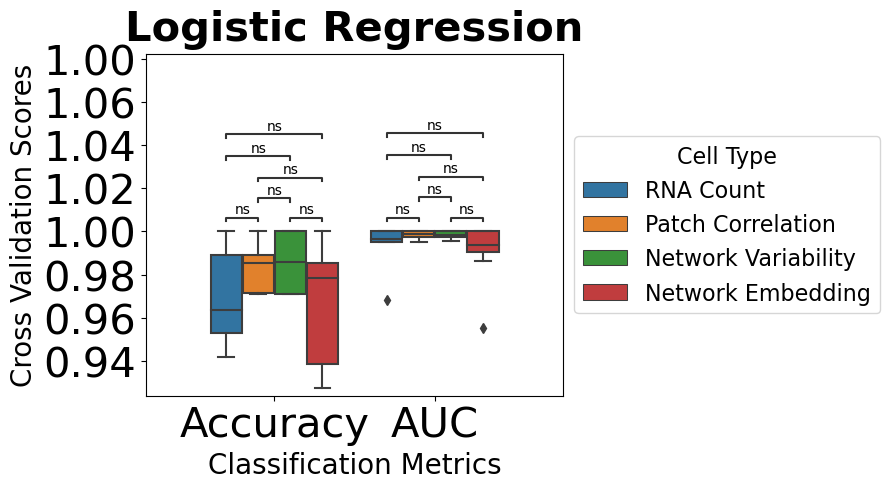

In [139]:
channel_pairs = logistic_df["Metric"].unique()
hue = "Data"
x = "Metric"
metrics = logistic_df["Metric"].unique()
y = "CV Score"
hue_order=['RNA count', 'Patch Correlation', 'Network Variability', 'Network Embedding']
plt.figure(figsize=(9, 5))
plt.title('Logistic Regression',fontsize= 30, pad=10, fontweight ="bold")

comparisons = [('RNA Count','Patch Correlation'),('RNA Count','Network Variability'),
               ('RNA Count','Network Embedding'),('Patch Correlation','Network Variability'),
               ('Patch Correlation','Network Embedding'),('Network Variability','Network Embedding')]
box_pairs = []
for chan in channel_pairs:
    for c in comparisons:
        box_pair = ((chan, c[0]), (chan, c[1]))
        box_pairs.append(box_pair)

g = sns.boxplot(data=logistic_df, hue=hue, x=x, y=y)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)

add_stat_annotation(g, data=logistic_df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, comparisons_correction =None)
g.figure.axes[-1].yaxis.label.set_size(20)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_xlabel("Classification Metrics",fontsize=20)
g.set_ylabel("Cross Validation Scores",fontsize=20)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title='Cell Type', fontsize=16, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(r'.\figures\Logistic regression cv scores.png', bbox_inches="tight")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AUC_Network Variability v.s. AUC_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=2.072e-01 U_stat=4.450e+01
Accuracy_Network Variability v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=3.083e-01 U_stat=4.200e+01
Accuracy_RNA Count v.s. Accuracy_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=2.809e-01 U_stat=2.150e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=1.702e-01 U_stat=1.900e+01
AUC_RNA Count v.s. AUC_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=7.923e-01 U_stat=3.500e+01
AUC_Patch Correlation v.s. AUC_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=1.719e-01 U_stat=1.850e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test t

C:\Users\zfang38\AppData\Local\Temp\ipykernel_44248\3910898116.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)


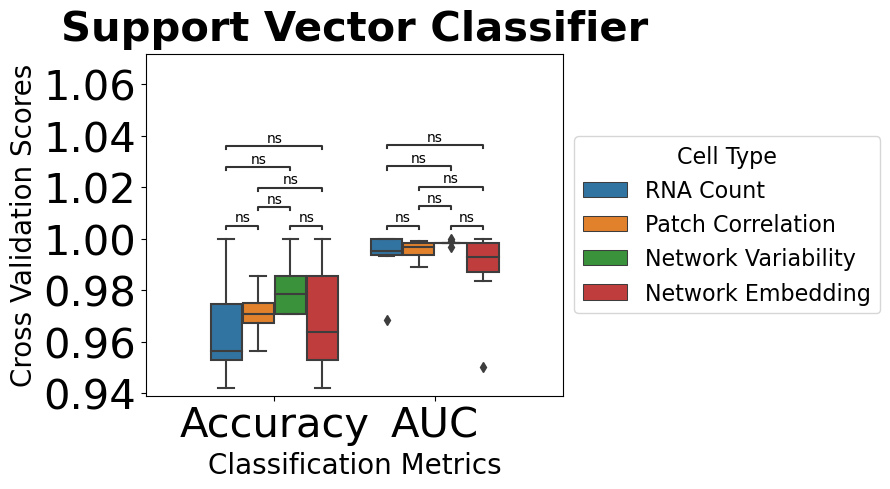

In [137]:
channel_pairs = svm_df["Metric"].unique()
hue = "Data"
x = "Metric"
metrics = svm_df["Metric"].unique()
y = "CV Score"
hue_order=['RNA count', 'Patch Correlation', 'Network Variability', 'Network Embedding']
plt.figure(figsize=(9, 5))
plt.title('Support Vector Classifier',fontsize= 30, pad=10, fontweight ="bold")

comparisons = [('RNA Count','Patch Correlation'),('RNA Count','Network Variability'),
               ('RNA Count','Network Embedding'),('Patch Correlation','Network Variability'),
               ('Patch Correlation','Network Embedding'),('Network Variability','Network Embedding')]
box_pairs = []
for chan in channel_pairs:
    for c in comparisons:
        box_pair = ((chan, c[0]), (chan, c[1]))
        box_pairs.append(box_pair)

g = sns.boxplot(data=svm_df, hue=hue, x=x, y=y)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)

add_stat_annotation(g, data=svm_df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, comparisons_correction =None)
g.figure.axes[-1].yaxis.label.set_size(20)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_xlabel("Classification Metrics",fontsize=20)
g.set_ylabel("Cross Validation Scores",fontsize=20)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title='Cell Type', fontsize=16, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(r'.\figures\support vector cv scores.png', bbox_inches="tight")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AUC_Network Variability v.s. AUC_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=1.291e-02 U_stat=5.600e+01
Accuracy_Network Variability v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=7.186e-02 U_stat=4.950e+01
Accuracy_RNA Count v.s. Accuracy_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=6.200e-03 U_stat=5.800e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=5.918e-01 U_stat=2.650e+01
AUC_RNA Count v.s. AUC_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=6.562e-03 U_stat=5.800e+01
AUC_Patch Correlation v.s. AUC_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=3.910e-02 U_stat=1.200e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test t

C:\Users\zfang38\AppData\Local\Temp\ipykernel_44248\1945868788.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)


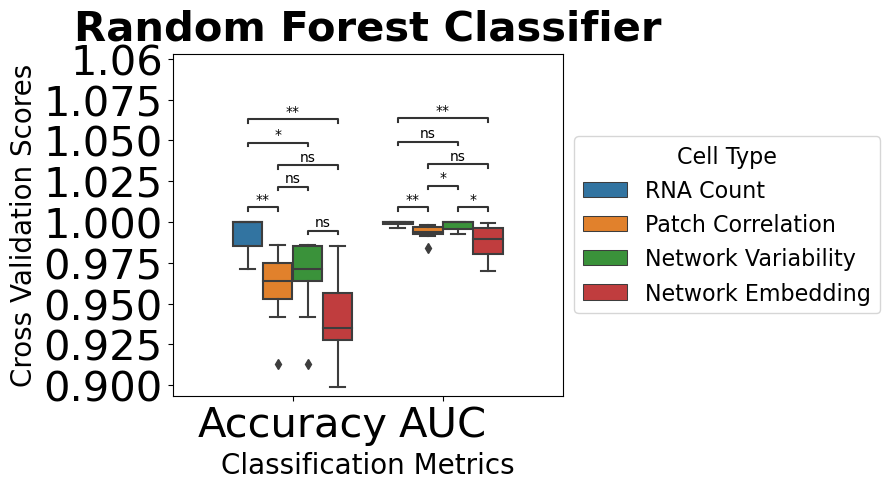

In [142]:
channel_pairs = rf_df["Metric"].unique()
hue = "Data"
x = "Metric"
metrics = rf_df["Metric"].unique()
y = "CV Score"
hue_order=['RNA count', 'Patch Correlation', 'Network Variability', 'Network Embedding']
plt.figure(figsize=(9, 5))
plt.title('Random Forest Classifier',fontsize= 30, pad=10, fontweight ="bold")

comparisons = [('RNA Count','Patch Correlation'),('RNA Count','Network Variability'),
               ('RNA Count','Network Embedding'),('Patch Correlation','Network Variability'),
               ('Patch Correlation','Network Embedding'),('Network Variability','Network Embedding')]
box_pairs = []
for chan in channel_pairs:
    for c in comparisons:
        box_pair = ((chan, c[0]), (chan, c[1]))
        box_pairs.append(box_pair)

g = sns.boxplot(data=rf_df, hue=hue, x=x, y=y)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)

add_stat_annotation(g, data=rf_df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, comparisons_correction =None)
g.figure.axes[-1].yaxis.label.set_size(20)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_xlabel("Classification Metrics",fontsize=20)
g.set_ylabel("Cross Validation Scores",fontsize=20)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title='Cell Type', fontsize=16, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(r'.\figures\random forest cv scores.png', bbox_inches="tight")
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AUC_Network Variability v.s. AUC_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=9.310e-04 U_stat=0.000e+00
Accuracy_Network Variability v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test two-sided, P_val=9.229e-04 U_stat=0.000e+00
Accuracy_RNA Count v.s. Accuracy_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=8.446e-04 U_stat=6.400e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=4.515e-03 U_stat=5.950e+01
AUC_RNA Count v.s. AUC_Patch Correlation: Mann-Whitney-Wilcoxon test two-sided, P_val=2.118e-03 U_stat=6.100e+01
AUC_Patch Correlation v.s. AUC_Network Variability: Mann-Whitney-Wilcoxon test two-sided, P_val=5.351e-03 U_stat=5.900e+01
Accuracy_Patch Correlation v.s. Accuracy_Network Embedding: Mann-Whitney-Wilcoxon test t

C:\Users\zfang38\AppData\Local\Temp\ipykernel_44248\2833287614.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)


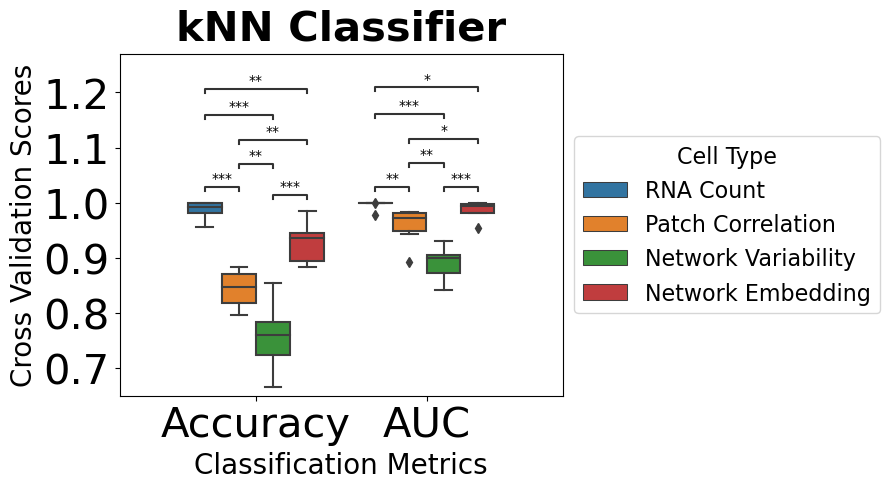

In [143]:
channel_pairs = knn_df["Metric"].unique()
hue = "Data"
x = "Metric"
metrics = knn_df["Metric"].unique()
y = "CV Score"
hue_order=['RNA count', 'Patch Correlation', 'Network Variability', 'Network Embedding']
plt.figure(figsize=(9, 5))
plt.title('kNN Classifier',fontsize= 30, pad=10, fontweight ="bold")

comparisons = [('RNA Count','Patch Correlation'),('RNA Count','Network Variability'),
               ('RNA Count','Network Embedding'),('Patch Correlation','Network Variability'),
               ('Patch Correlation','Network Embedding'),('Network Variability','Network Embedding')]
box_pairs = []
for chan in channel_pairs:
    for c in comparisons:
        box_pair = ((chan, c[0]), (chan, c[1]))
        box_pairs.append(box_pair)

g = sns.boxplot(data=knn_df, hue=hue, x=x, y=y)
# locs, labels = plt.xticks()
# plt.setp(labels, rotation=90)

add_stat_annotation(g, data=knn_df, x=x, y=y, hue=hue, box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2, comparisons_correction =None)
g.figure.axes[-1].yaxis.label.set_size(20)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 30)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 30)
g.set_xlabel("Classification Metrics",fontsize=20)
g.set_ylabel("Cross Validation Scores",fontsize=20)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, labels, title='Cell Type', fontsize=16, title_fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(r'.\figures\knn cv scores.png', bbox_inches="tight")
plt.show()

## plotting

In [17]:
import seaborn as sns
from matplotlib import rc_context

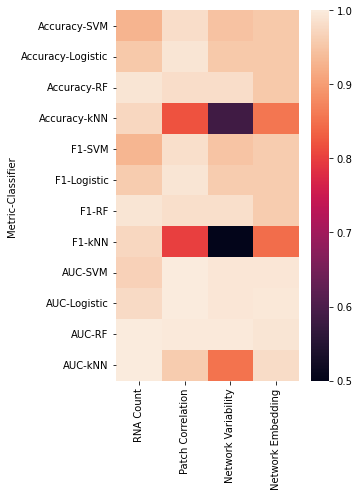

In [18]:
with rc_context({'font.size':20}):
    fig,ax = plt.subplots(1,1,figsize=(5,7))
    sns.heatmap(df, vmin=0.5, vmax=1, ax=ax)
    plt.tight_layout()
    # plt.savefig(r'.\figures\msc_ml_comparison.png')

In [19]:
df

RNA Count  Patch Correlation  Network Variability  \
Metric   Classifier                                                      
Accuracy SVM          0.927928           0.981982             0.945946   
         Logistic     0.954955           0.990991             0.954955   
         RF           0.990991           0.981982             0.981982   
         kNN          0.972973           0.819820             0.585586   
F1       SVM          0.931034           0.983333             0.949153   
         Logistic     0.957265           0.991736             0.957983   
         RF           0.991597           0.983607             0.983607   
         kNN          0.974359           0.800000             0.378378   
AUC      SVM          0.966667           0.998693             0.992484   
         Logistic     0.978105           0.998693             0.993791   
         RF           0.998203           0.997222             0.996732   
         kNN          0.999837           0.957680             0.852941   

                     Network Embedding  
Metric   Classifier                     
Accuracy SVM                  0.954955  
         Logistic             0.954955  
         RF                   0.954955  
         kNN                  0.855856  
F1       SVM                  0.957983  
         Logistic             0.957983  
         RF                   0.957983  
         kNN                  0.846154  
AUC      SVM                  0.993464  
         Logistic             0.996078  
         RF                   0.991830  
         kNN                  0.980229

In [20]:
df['Network Embedding'].loc[('Accuracy','SVM')]

0.954954954954955

In [21]:
datasets = ['Count','Count','Count','Embedding','Embedding','Embedding',
            'Count','Count','Count','Embedding','Embedding','Embedding',
            'Count','Count','Count','Embedding','Embedding','Embedding']
classifiers = ['SVM','Logistic','RF','SVM','Logistic','RF',
               'SVM','Logistic','RF','SVM','Logistic','RF',
               'SVM','Logistic','RF','SVM','Logistic','RF']
metrics = ['Accuracy','Accuracy','Accuracy','Accuracy','Accuracy',
           'F1','F1','F1','F1','F1','F1',
           'AUC','AUC','AUC','AUC','AUC','AUC']

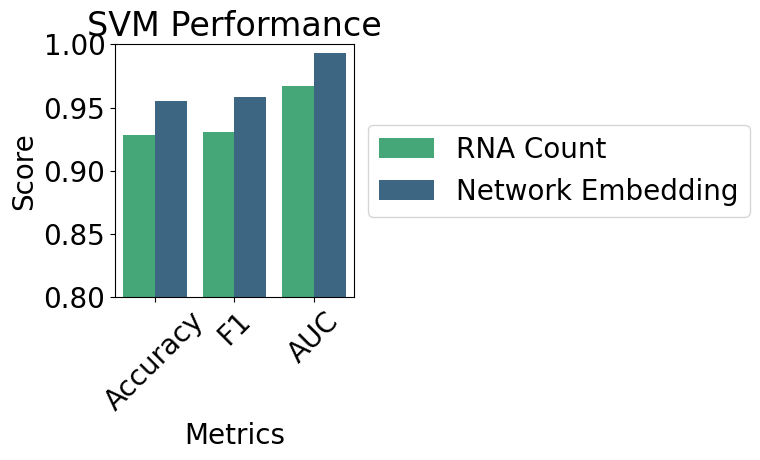

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
dataset = ['RNA Count','Network Embedding','RNA Count', 'Network Embedding','RNA Count','Network Embedding']
metrics = ['Accuracy','Accuracy','F1','F1','AUC','AUC']
values = []
for i in range(6):
    values.append(df[dataset[i]].loc[(metrics[i],'SVM')])

# Create a DataFrame from the data
data = {'Dataset': dataset,
        'Metrics': metrics,
        'Value': values}
df_temp = pd.DataFrame(data)

# Create a grouped bar plot using Seaborn
with rc_context({'font.size':20}):
    fig,ax = plt.subplots(1,1,figsize=(8, 5))
    sns.barplot(x='Metrics', y='Value', hue='Dataset', data=df_temp,ax=ax,palette='viridis_r')

    # Add title and labels
    ax.set_title('SVM Performance')
    ax.set_xlabel('Metrics')
    ax.set_xticklabels(['Accuracy','F1','AUC'],rotation=45)
    ax.set_ylabel('Score')
    ax.set_ylim([0.8,1])
    
    ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
    

    # Show the plot
    plt.tight_layout()
    # plt.savefig(r'.\figures\SVM performance')
    plt.show()


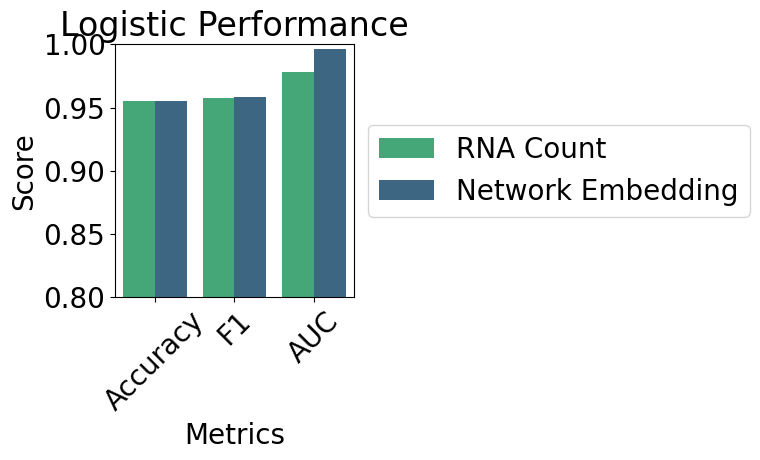

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
dataset = ['RNA Count','Network Embedding','RNA Count', 'Network Embedding','RNA Count','Network Embedding']
metrics = ['Accuracy','Accuracy','F1','F1','AUC','AUC']
values = []
for i in range(6):
    values.append(df[dataset[i]].loc[(metrics[i],'Logistic')])

# Create a DataFrame from the data
data = {'Dataset': dataset,
        'Metrics': metrics,
        'Value': values}
df_temp = pd.DataFrame(data)

# Create a grouped bar plot using Seaborn
with rc_context({'font.size':20}):
    fig,ax = plt.subplots(1,1,figsize=(8, 5))
    sns.barplot(x='Metrics', y='Value', hue='Dataset', data=df_temp,ax=ax,palette='viridis_r')

    # Add title and labels
    ax.set_title('Logistic Performance')
    ax.set_xlabel('Metrics')
    ax.set_xticklabels(['Accuracy','F1','AUC'],rotation=45)
    ax.set_ylabel('Score')
    ax.set_ylim([0.8,1])
    
    ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
    

    # Show the plot
    plt.tight_layout()
    # plt.savefig(r'.\figures\Logistic performance')
    plt.show()


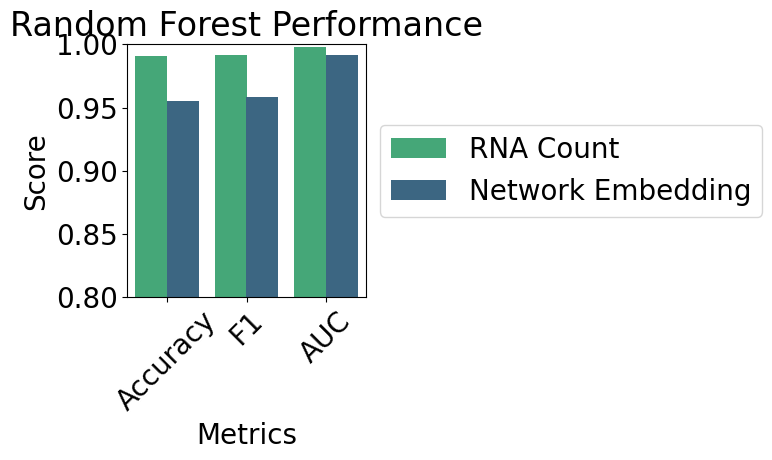

In [26]:
# Sample data
dataset = ['RNA Count','Network Embedding','RNA Count', 'Network Embedding','RNA Count','Network Embedding']
metrics = ['Accuracy','Accuracy','F1','F1','AUC','AUC']
values = []
for i in range(6):
    values.append(df[dataset[i]].loc[(metrics[i],'RF')])

# Create a DataFrame from the data
data = {'Dataset': dataset,
        'Metrics': metrics,
        'Value': values}
df_temp = pd.DataFrame(data)

# Create a grouped bar plot using Seaborn
with rc_context({'font.size':20}):
    fig,ax = plt.subplots(1,1,figsize=(8, 5))
    sns.barplot(x='Metrics', y='Value', hue='Dataset', data=df_temp,ax=ax,palette='viridis_r')

    # Add title and labels
    ax.set_title('Random Forest Performance')
    ax.set_xlabel('Metrics')
    ax.set_xticklabels(['Accuracy','F1','AUC'],rotation=45)
    ax.set_ylabel('Score')
    ax.set_ylim([0.8,1])
    
    ax.legend(loc='center left',bbox_to_anchor=(1,0.5))
    

    # Show the plot
    plt.tight_layout()
    # plt.savefig(r'.\figures\RF performance')
    plt.show()


# GAE hyperparameter tuning classification

In [99]:
in_dir = r'.\results\gae_hyperparameter'
fn_l = os.listdir(in_dir)
fn_l.sort()

In [227]:
HIDDEN_SIZE = np.arange(50,300, 25)
OUT_CHANNEL = np.arange(25,150,25)
accuracies = np.zeros((HIDDEN_SIZE.shape[0],OUT_CHANNEL.shape[0]))
auc = np.zeros((HIDDEN_SIZE.shape[0],OUT_CHANNEL.shape[0]))
f1 = np.zeros((HIDDEN_SIZE.shape[0],OUT_CHANNEL.shape[0]))

In [228]:
for fn in tqdm(fn_l):
    if fn.endswith('.csv'):
        hidden_size = fn.split('_')[0]
        out_channel = fn.split('_')[1]
        idx0 = np.where(HIDDEN_SIZE==float(hidden_size))[0][0]
        idx1 = np.where(OUT_CHANNEL==float(out_channel))[0][0]
        
        data = pd.read_csv(os.path.join(in_dir, fn),index_col=0)
        
        # pooling
        cellID = []
        for item in data.index.tolist():
            temp = item.split('_')
            cellID.append(temp[0]+'_'+temp[1]+'_'+temp[2])
        
        data.insert(loc=data.shape[1],column='cellID',value=cellID)
        data_by_cell = data.groupby('cellID')
        pooled_features = data_by_cell.mean()
        
        # y label
        y = []
        for item in pooled_features.index.tolist():
            if item.split('_')[0] == 'bm':
                y.append('HBM')
            else:
                y.append('HUC')
        
        # classification with svm
        x = pooled_features.values.astype('float')
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        svc = SVC(kernel='linear',probability=True)
        svc.fit(x_train,y_train)
        y_pred = svc.predict(x_test)
        y_prob = svc.predict_proba(x_test)
        
        # evaluation
        accuracies[idx0,idx1] = accuracy_score(y_test, y_pred)
        auc[idx0,idx1] = roc_auc_score(y_test, y_prob[:,1])
        f1[idx0,idx1] = f1_score(y_test, y_pred, pos_label='HBM')

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.35it/s]


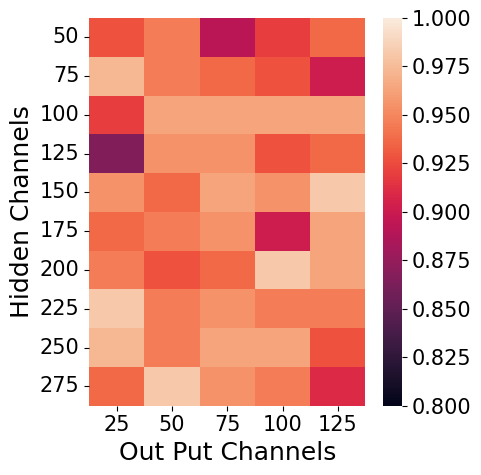

In [162]:
accuracy_df = pd.DataFrame(accuracies,index=list(HIDDEN_SIZE),columns=list(OUT_CHANNEL))
with rc_context({'font.size':15,'figure.figsize':(5,5)}):
    ax = sns.heatmap(accuracy_df,vmin=0.8,vmax=1)
    ax.set_xlabel('Out Put Channels',fontsize=18)
    ax.set_ylabel('Hidden Channels',fontsize=18)
    plt.tight_layout()
    plt.savefig(r'.\figures\gae hyperparameters accuracy.png')

In [165]:
accuracy_df.stack().idxmax()

(150, 125)

In [167]:
accuracy_df.loc[200,100]

0.9819819819819819

In [168]:
accuracy_df.loc[150,125]

0.9819819819819819

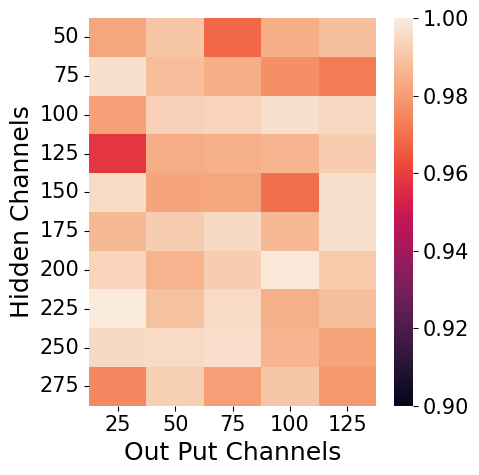

In [164]:
auc_df = pd.DataFrame(auc,index=list(HIDDEN_SIZE),columns=list(OUT_CHANNEL))
with rc_context({'font.size':15,'figure.figsize':(5,5)}):
    ax = sns.heatmap(auc_df,vmin=0.9,vmax=1)
    ax.set_xlabel('Out Put Channels',fontsize=18)
    ax.set_ylabel('Hidden Channels',fontsize=18)
    plt.tight_layout()
    plt.savefig(r'.\figures\gae hyperparameters auc.png')

In [169]:
auc_df.loc[200,100]

0.9990196078431373

In [170]:
auc_df.loc[150,125]

0.9970588235294118

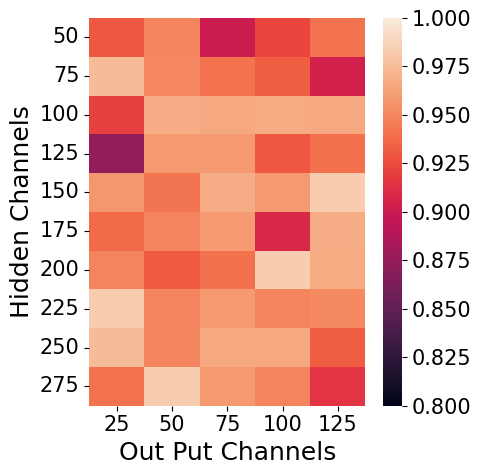

In [230]:
f1_df = pd.DataFrame(f1,index=list(HIDDEN_SIZE),columns=list(OUT_CHANNEL))
with rc_context({'font.size':15,'figure.figsize':(5,5)}):
    ax = sns.heatmap(f1_df,vmin=0.8,vmax=1)
    ax.set_xlabel('Out Put Channels',fontsize=18)
    ax.set_ylabel('Hidden Channels',fontsize=18)
    plt.tight_layout()
    plt.savefig(r'.\figures\gae hyperparameters f1.png')